In [1]:
import pandas as pd

In [2]:
DF = pd.read_excel('data_final.xlsx')

In [3]:
#убираем префиксы в месяце и недели
DF['Month_num'] = DF['Month'].str.replace("M", "", regex=False).str.zfill(2)
DF['Week_num'] = DF['Week'].str.replace("W", "", regex=False).str.zfill(2)

#создаем метку даты
DF['Year_month_week'] = DF['Year'].astype(str) + '-' + DF['Month_num'] + '-' + DF['Week_num']

#создаем форматы даты, на конец недели (пятница), тк данные за продажи - на конец недели
DF['Week_End_Date'] = pd.to_datetime(
    DF['Year'].astype(str) + DF['Week_num'] + '5',
    format='%G%V%u'
)

In [4]:
#удаляем исходные столбцы месяца и недели
DF = DF.drop(columns=['Month', 'Week'])

обезличивание

In [5]:
import string

In [6]:
def number_to_letters(n, lowercase=False):
    #преобразует 1, 2, ... в A, B, ..., Z, AA, AB или a, b, ..., aa
    letters = string.ascii_lowercase if lowercase else string.ascii_uppercase
    result = ''
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        result = letters[remainder] + result
    return result

#основная функция кодирования
def encode_categorical_with_letters(df):
    encoding_maps = {}
    decoding_maps = {}

    #Territory: заглавные буквы
    territory_uniques = df['Territory'].unique()
    territory_codes = [number_to_letters(i + 1) for i in range(len(territory_uniques))]
    territory_map = dict(zip(territory_uniques, territory_codes))
    df['Territory_code'] = df['Territory'].map(territory_map)
    encoding_maps['Territory'] = territory_map
    decoding_maps['Territory'] = {v: k for k, v in territory_map.items()}

    #Plant: строчные буквы и комбинации
    plant_uniques = df['Plant'].unique()
    plant_codes = [number_to_letters(i + 1, lowercase=True) for i in range(len(plant_uniques))]
    plant_map = dict(zip(plant_uniques, plant_codes))
    df['Plant_code'] = df['Plant'].map(plant_map)
    encoding_maps['Plant'] = plant_map
    decoding_maps['Plant'] = {v: k for k, v in plant_map.items()}

    #Brand: двухбуквенные заглавные коды (начиная с AA)
    brand_uniques = df['Brand'].unique()
    brand_codes = [number_to_letters(i + 27) for i in range(len(brand_uniques))]  # AA = 27
    brand_map = dict(zip(brand_uniques, brand_codes))
    df['Brand_code'] = df['Brand'].map(brand_map)
    encoding_maps['Brand'] = brand_map
    decoding_maps['Brand'] = {v: k for k, v in brand_map.items()}

    return df, encoding_maps, decoding_maps

In [7]:
DF_encoded, encoding_maps, decoding_maps = encode_categorical_with_letters(DF)

In [8]:
DF_coded_result = DF_encoded.drop(columns=['CPL Name', 'Territory', 'Plant', 'Brand', 'Product']).copy()
DF_coded_result

,Year,Package,SKU,Sum of Plan,fact,Month_num,Week_num,Year_month_week,Week_End_Date,Territory_code,Plant_code,Brand_code
0,2023,PET 0.5,2418701,1.000000,0.0,01,01,2023-01-01,2023-01-06,A,a,AA
1,2023,PET 0.5,2418801,23.000000,2.0,01,01,2023-01-01,2023-01-06,A,a,AA
2,2023,PET 1.0,2418901,2.000000,6.0,01,01,2023-01-01,2023-01-06,A,a,AA
3,2023,PET 1.0,2419001,0.000000,2.0,01,01,2023-01-01,2023-01-06,A,a,AA
4,2023,CAN 0.449,2057102,0.000000,2.0,01,01,2023-01-01,2023-01-06,A,a,AB
...,...,...,...,...,...,...,...,...,...,...,...,...
427782,2024,PET 0.5,2419602,0.202149,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ
427783,2024,PET 1.0,2419202,0.199148,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ
427784,2024,PET 1.0,2419702,0.077565,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ
427785,2024,PET 0.5,2553701,0.427467,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ


In [10]:
DF_coded_result.to_csv('DF_coded_result.csv', index = False)

In [2]:
DF_coded_result = pd.read_csv('DF_coded_result.csv')
DF_coded_result['Week_End_Date'] = pd.to_datetime(DF_coded_result['Week_End_Date'])
DF_coded_result

,Year,Package,SKU,Sum of Plan,fact,Month_num,Week_num,Year_month_week,Week_End_Date,Territory_code,Plant_code,Brand_code
0,2023,PET 0.5,2418701,1.000000,0.0,1,1,2023-01-01,2023-01-06,A,a,AA
1,2023,PET 0.5,2418801,23.000000,2.0,1,1,2023-01-01,2023-01-06,A,a,AA
2,2023,PET 1.0,2418901,2.000000,6.0,1,1,2023-01-01,2023-01-06,A,a,AA
3,2023,PET 1.0,2419001,0.000000,2.0,1,1,2023-01-01,2023-01-06,A,a,AA
4,2023,CAN 0.449,2057102,0.000000,2.0,1,1,2023-01-01,2023-01-06,A,a,AB
...,...,...,...,...,...,...,...,...,...,...,...,...
427782,2024,PET 0.5,2419602,0.202149,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ
427783,2024,PET 1.0,2419202,0.199148,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ
427784,2024,PET 1.0,2419702,0.077565,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ
427785,2024,PET 0.5,2553701,0.427467,0.0,12,52,2024-12-52,2024-12-27,I,an,AJ


Данные готовы к следующему этапу

EDA

In [3]:
#создаем новый df, используя агрегация на уровне территория - склад - бренд - литраж - план - факт - неделя
agg_df = DF_coded_result.groupby(['Territory_code', 'Plant_code', 'Brand_code', 'Package', 'Week_End_Date'], as_index=False).agg({
    'Sum of Plan': 'sum',
    'fact' : 'sum'
})
agg_df

,Territory_code,Plant_code,Brand_code,Package,Week_End_Date,Sum of Plan,fact
0,A,a,AA,PET 0.5,2023-01-06,24.000000,2.000
1,A,a,AA,PET 0.5,2023-01-13,22.000000,6.000
2,A,a,AA,PET 0.5,2023-01-20,87.000000,11.000
3,A,a,AA,PET 0.5,2023-01-27,101.000000,6.000
4,A,a,AA,PET 0.5,2023-02-03,46.443001,8.452
...,...,...,...,...,...,...,...
87421,I,an,AJ,PET 1.0,2024-11-29,0.953102,0.000
87422,I,an,AJ,PET 1.0,2024-12-06,1.137667,0.000
87423,I,an,AJ,PET 1.0,2024-12-13,1.038546,0.000
87424,I,an,AJ,PET 1.0,2024-12-20,1.357112,0.000


После выполнения данной агрегации можно увидеть, что некоторые склады прекратили свою работу, поскольку такие данные нам не нужны, то можно их удалить, чтобы не в дальнейшем они не мешали анализу и построению прогноза.
Список таких складов ниже

In [4]:
#Проверяем кол-во недель, по которым есть данные
agg_df.groupby(['Territory_code', 'Plant_code', 'Brand_code', 'Package']).agg({'Week_End_Date': 'count'})

Week_End_Date
Territory_code Plant_code Brand_code Package                 
A              a          AA         PET 0.5               58
                                     PET 1.0               58
                          AB         CAN 0.449            103
                          AC         PET 0.3               58
                                     TP 0.2               103
...                                                       ...
I              an         AH         CAN 0.33              57
                                     PET 1.0              104
                          AI         CAN 0.33              36
                          AJ         PET 0.5               34
                                     PET 1.0               13

[1065 rows x 1 columns]

In [5]:
plant_to_delete = ['av', 'at', 'j', 'aw', 't', 'x', 'au']

In [6]:
agg_df_WO_closed_plants = agg_df[~agg_df['Plant_code'].isin(plant_to_delete)].copy()
agg_df_WO_closed_plants

,Territory_code,Plant_code,Brand_code,Package,Week_End_Date,Sum of Plan,fact
0,A,a,AA,PET 0.5,2023-01-06,24.000000,2.000
1,A,a,AA,PET 0.5,2023-01-13,22.000000,6.000
2,A,a,AA,PET 0.5,2023-01-20,87.000000,11.000
3,A,a,AA,PET 0.5,2023-01-27,101.000000,6.000
4,A,a,AA,PET 0.5,2023-02-03,46.443001,8.452
...,...,...,...,...,...,...,...
87421,I,an,AJ,PET 1.0,2024-11-29,0.953102,0.000
87422,I,an,AJ,PET 1.0,2024-12-06,1.137667,0.000
87423,I,an,AJ,PET 1.0,2024-12-13,1.038546,0.000
87424,I,an,AJ,PET 1.0,2024-12-20,1.357112,0.000


Напишем функцию, которая заполнит отсутствующие строки между неделями продаж, если такие есть.
Тк в данном случае - отсутствие информации за неделю расценивается как факт продаж 0

In [7]:
def fill_missing_weeks(agg_df_WO_closed_plants, date_col='Week_End_Date'):
    #формируем все возможные даты с шагом 7 дней (пятницы)
    min_date = agg_df_WO_closed_plants[date_col].min()
    max_date = agg_df_WO_closed_plants[date_col].max()

    all_weeks = pd.date_range(start=min_date, end=max_date, freq='W-FRI')

    #список всех реальных уникальных комбинаций
    unique_combinations = agg_df_WO_closed_plants[['Territory_code', 'Plant_code', 'Brand_code', 'Package']].drop_duplicates()

    #создаем базу для восстановления
    full_grid = []

    for idx, row in unique_combinations.iterrows():
        territory, plant, brand, package = row['Territory_code'], row['Plant_code'], row['Brand_code'], row['Package']

        #фильтруем по текущей комбинации
        temp_df = agg_df_WO_closed_plants[
            (agg_df_WO_closed_plants['Territory_code'] == territory) &
            (agg_df_WO_closed_plants['Plant_code'] == plant) &
            (agg_df_WO_closed_plants['Brand_code'] == brand) &
            (agg_df_WO_closed_plants['Package'] == package)
        ]

        if temp_df.empty:
            continue

        #определяем минимальную и максимальную дату
        min_comb_date = temp_df[date_col].min()
        max_comb_date = temp_df[date_col].max()

        #формируем список нужных дат
        valid_weeks = [w for w in all_weeks if min_comb_date <= w <= max_comb_date]

        #заполняем для этой комбинации
        for week in valid_weeks:
            full_grid.append((territory, plant, brand, package, week))

    #превращаем в df
    full_grid_df = pd.DataFrame(full_grid, columns=['Territory_code', 'Plant_code', 'Brand_code', 'Package', date_col])

    #делаем джоин исходных данных к полной сетке
    result_df = full_grid_df.merge(
        agg_df_WO_closed_plants,
        on=['Territory_code', 'Plant_code', 'Brand_code', 'Package', date_col],
        how='left'
    )

    #где нет плана и факта ставим 0
    result_df['Sum of Plan'] = result_df['Sum of Plan'].fillna(0)
    result_df['fact'] = result_df['fact'].fillna(0)

    return result_df


In [8]:
#вызов функции для дополнения пропущенных недель
add_weeks_df = fill_missing_weeks(agg_df_WO_closed_plants, date_col='Week_End_Date')

#сортировка по ключевым полям для порядка
add_weeks_df = add_weeks_df.sort_values(
    ['Territory_code', 'Plant_code', 'Brand_code', 'Package', 'Week_End_Date']
).reset_index(drop=True)

In [9]:
add_weeks_df

,Territory_code,Plant_code,Brand_code,Package,Week_End_Date,Sum of Plan,fact
0,A,a,AA,PET 0.5,2023-01-06,24.000000,2.000
1,A,a,AA,PET 0.5,2023-01-13,22.000000,6.000
2,A,a,AA,PET 0.5,2023-01-20,87.000000,11.000
3,A,a,AA,PET 0.5,2023-01-27,101.000000,6.000
4,A,a,AA,PET 0.5,2023-02-03,46.443001,8.452
...,...,...,...,...,...,...,...
90420,I,an,AJ,PET 1.0,2024-11-29,0.953102,0.000
90421,I,an,AJ,PET 1.0,2024-12-06,1.137667,0.000
90422,I,an,AJ,PET 1.0,2024-12-13,1.038546,0.000
90423,I,an,AJ,PET 1.0,2024-12-20,1.357112,0.000


In [10]:
#проверяем какие изменения
add_weeks_df.groupby(['Territory_code', 'Plant_code', 'Brand_code', 'Package']).agg({'Week_End_Date': 'count'})

Week_End_Date
Territory_code Plant_code Brand_code Package                 
A              a          AA         PET 0.5               73
                                     PET 1.0               73
                          AB         CAN 0.449            104
                          AC         PET 0.3               73
                                     TP 0.2               104
...                                                       ...
I              an         AH         CAN 0.33             104
                                     PET 1.0              104
                          AI         CAN 0.33              73
                          AJ         PET 0.5               69
                                     PET 1.0               35

[966 rows x 1 columns]

Создадим еще одну функцию, которая будет проверять наличие продаж за последние Х месяцев.
Если продажи были, то поставит 1, если нет, то 0
Это поможет убрать строчки, если продукция прекратила продаваться

In [11]:
def mark_active_combinations(df, months=3, date_col='Week_End_Date'):
    #находим максимальную дату
    max_date = df[date_col].max()

    #рассчитываем дату сдвига назад на указанное количество месяцев
    months_ago = max_date - pd.DateOffset(months=months)

    #фильтруем данные за последние N месяцев
    recent_data = df[df[date_col] >= months_ago]

    #группируем и создаем флаг активности
    activity_flags = (
        recent_data
        .groupby(['Territory_code', 'Plant_code', 'Brand_code', 'Package'])['fact']
        .apply(lambda x: 1 if (x > 0).any() else 0)
        .reset_index()
        .rename(columns={'fact': 'active_last_{}_months'.format(months)})
    )

    #джойним обратно в основной df
    df = df.merge(
        activity_flags,
        on=['Territory_code', 'Plant_code', 'Brand_code', 'Package'],
        how='left'
    )

    #где активность нет продаж — ставим 0
    df['active_last_{}_months'.format(months)] = df['active_last_{}_months'.format(months)].fillna(0).astype(int)

    return df


In [12]:
check_fact_3_months = mark_active_combinations(add_weeks_df, months=3)
check_fact_3_months

,Territory_code,Plant_code,Brand_code,Package,Week_End_Date,Sum of Plan,fact,active_last_3_months
0,A,a,AA,PET 0.5,2023-01-06,24.000000,2.000,0
1,A,a,AA,PET 0.5,2023-01-13,22.000000,6.000,0
2,A,a,AA,PET 0.5,2023-01-20,87.000000,11.000,0
3,A,a,AA,PET 0.5,2023-01-27,101.000000,6.000,0
4,A,a,AA,PET 0.5,2023-02-03,46.443001,8.452,0
...,...,...,...,...,...,...,...,...
90420,I,an,AJ,PET 1.0,2024-11-29,0.953102,0.000,0
90421,I,an,AJ,PET 1.0,2024-12-06,1.137667,0.000,0
90422,I,an,AJ,PET 1.0,2024-12-13,1.038546,0.000,0
90423,I,an,AJ,PET 1.0,2024-12-20,1.357112,0.000,0


Оставляем только ту продукцию, которая продавалась последние 3 месяца

In [13]:
check_fact_3_months[check_fact_3_months['active_last_3_months'] == 1].groupby(['Territory_code', 'Plant_code', 'Brand_code', 'Package']).agg({'Week_End_Date': 'count'})

Week_End_Date
Territory_code Plant_code Brand_code Package                 
A              a          AB         CAN 0.449            104
                          AC         TP 0.2               104
                                     TP 1.0               104
                          AD         PET 1.0              104
                          AH         CAN 0.33             104
...                                                       ...
I              an         AE         PET 0.45             104
                                     PET 0.9              104
                          AF         TP 0.95              104
                                     TP 1.93              104
                          AH         PET 1.0              104

[866 rows x 1 columns]

Теперь у нас есть подготовленный для дальнейшего анализа df.
Из него убраны:
закрывшиеся склады
продукты, которые больше не продаются на этом складе

In [14]:
result_df = check_fact_3_months[check_fact_3_months['active_last_3_months'] == 1].copy()
result_df = result_df.sort_values(
    ['Territory_code', 'Plant_code', 'Brand_code', 'Week_End_Date']
).reset_index(drop=True)
result_df

,Territory_code,Plant_code,Brand_code,Package,Week_End_Date,Sum of Plan,fact,active_last_3_months
0,A,a,AB,CAN 0.449,2023-01-06,50.000000,83.000000,1
1,A,a,AB,CAN 0.449,2023-01-13,48.000000,42.000000,1
2,A,a,AB,CAN 0.449,2023-01-20,207.000000,184.000000,1
3,A,a,AB,CAN 0.449,2023-01-27,304.000000,220.000000,1
4,A,a,AB,CAN 0.449,2023-02-03,38.280999,217.319003,1
...,...,...,...,...,...,...,...,...
83391,I,an,AH,PET 1.0,2024-11-29,33.227102,0.000000,1
83392,I,an,AH,PET 1.0,2024-12-06,39.516632,67.617000,1
83393,I,an,AH,PET 1.0,2024-12-13,36.073700,40.148000,1
83394,I,an,AH,PET 1.0,2024-12-20,47.139008,27.469999,1


2.2.2 Анализ подготовленных данных

In [15]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83396 entries, 0 to 83395
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Territory_code        83396 non-null  object        
 1   Plant_code            83396 non-null  object        
 2   Brand_code            83396 non-null  object        
 3   Package               83396 non-null  object        
 4   Week_End_Date         83396 non-null  datetime64[ns]
 5   Sum of Plan           83396 non-null  float64       
 6   fact                  83396 non-null  float64       
 7   active_last_3_months  83396 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ MB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\3374767614.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_package_sales_top['Brand_Package'] = brand_package_sales_top['Brand_code'] + ' - ' + brand_package_sales_top['Package'].astype(str)
C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\3374767614.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


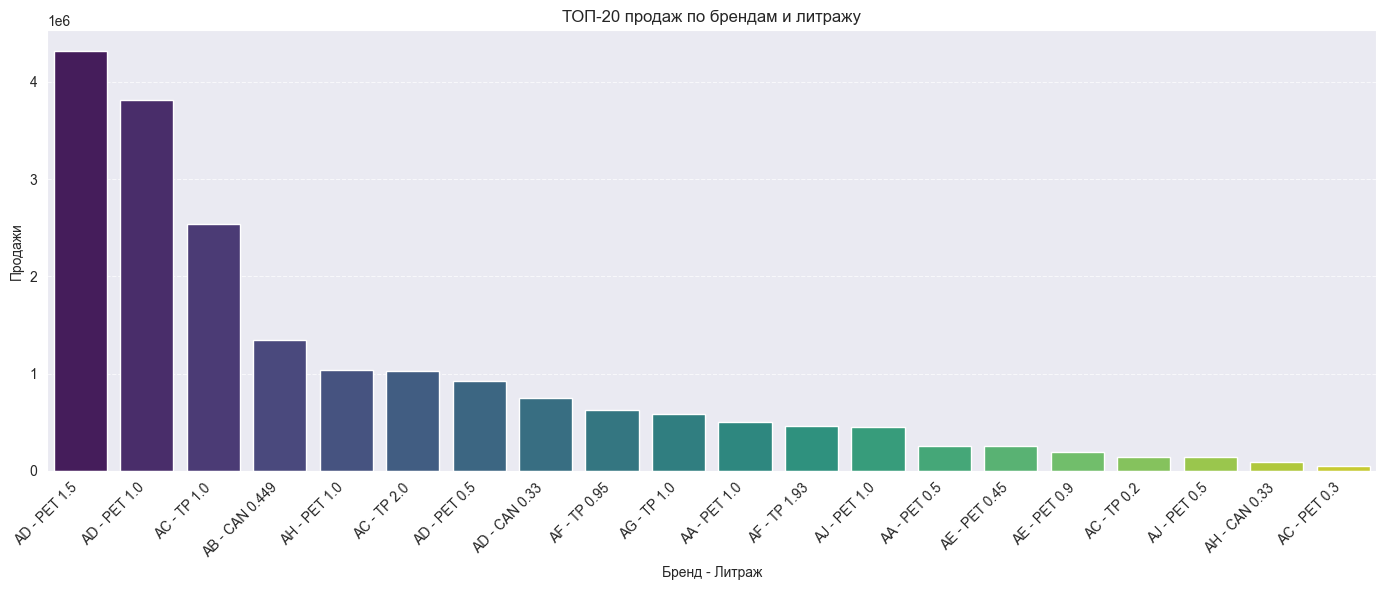

In [17]:
#группировка по Brand и Package, суммируем продажи
brand_package_sales = result_df.groupby(['Brand_code', 'Package'])['fact'].sum().reset_index()

#сортировка по фактическим продажам
brand_package_sales = brand_package_sales.sort_values('fact', ascending=False)

#берем ТОП-20
top_n = 20
brand_package_sales_top = brand_package_sales.head(top_n)

#создаем колонку для красивого отображения
brand_package_sales_top['Brand_Package'] = brand_package_sales_top['Brand_code'] + ' - ' + brand_package_sales_top['Package'].astype(str)

#строим график
plt.figure(figsize=(14, 6))
sns.barplot(
    data=brand_package_sales_top,
    x='Brand_Package',
    y='fact',
    palette='viridis'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Продажи')
plt.xlabel('Бренд - Литраж')
plt.title('ТОП-20 продаж по брендам и литражу')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

График для продаж по территориям

C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\3842010266.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


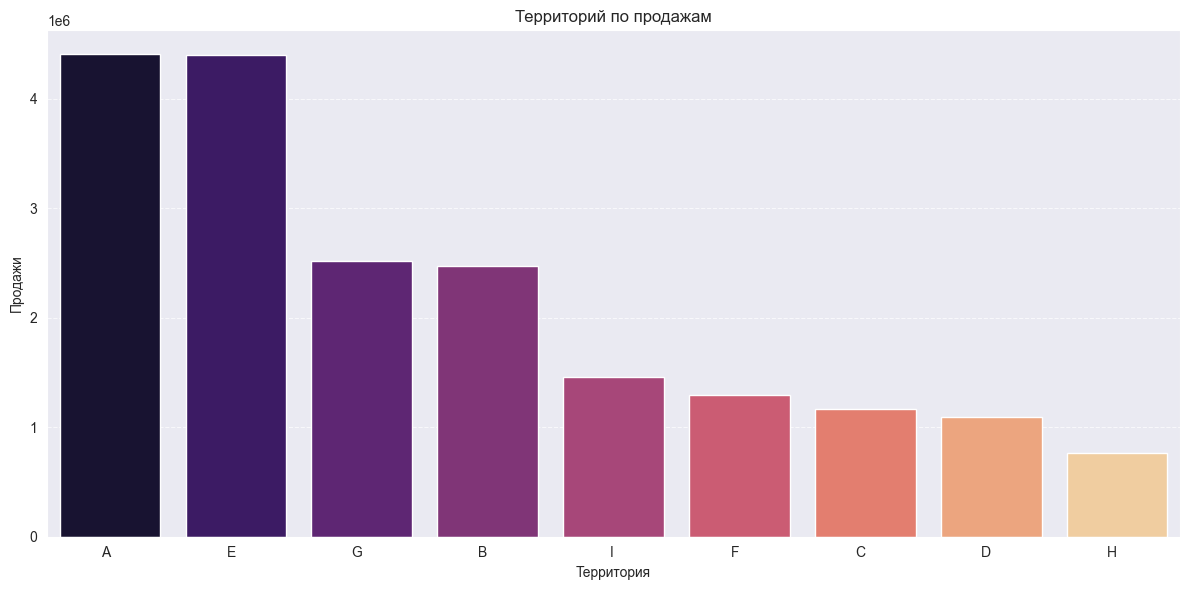

In [18]:
# Группировка по территории, суммируем продажи
territory_sales = result_df.groupby('Territory_code')['fact'].sum().reset_index()

# Сортировка по фактическим продажам
territory_sales = territory_sales.sort_values('fact', ascending=False)

# Берем ТОП-10 территорий (можно менять на больше/меньше)
top_n = 10
territory_sales_top = territory_sales.head(top_n)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(
    data=territory_sales_top,
    x='Territory_code',
    y='fact',
    palette='magma'
)

plt.xticks( ha='right')
plt.ylabel('Продажи')
plt.xlabel('Территория')
plt.title('Территорий по продажам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Разбивка каждой территории на бренд и литраж

C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\2745275304.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\2745275304.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\2745275304.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\2745275304.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

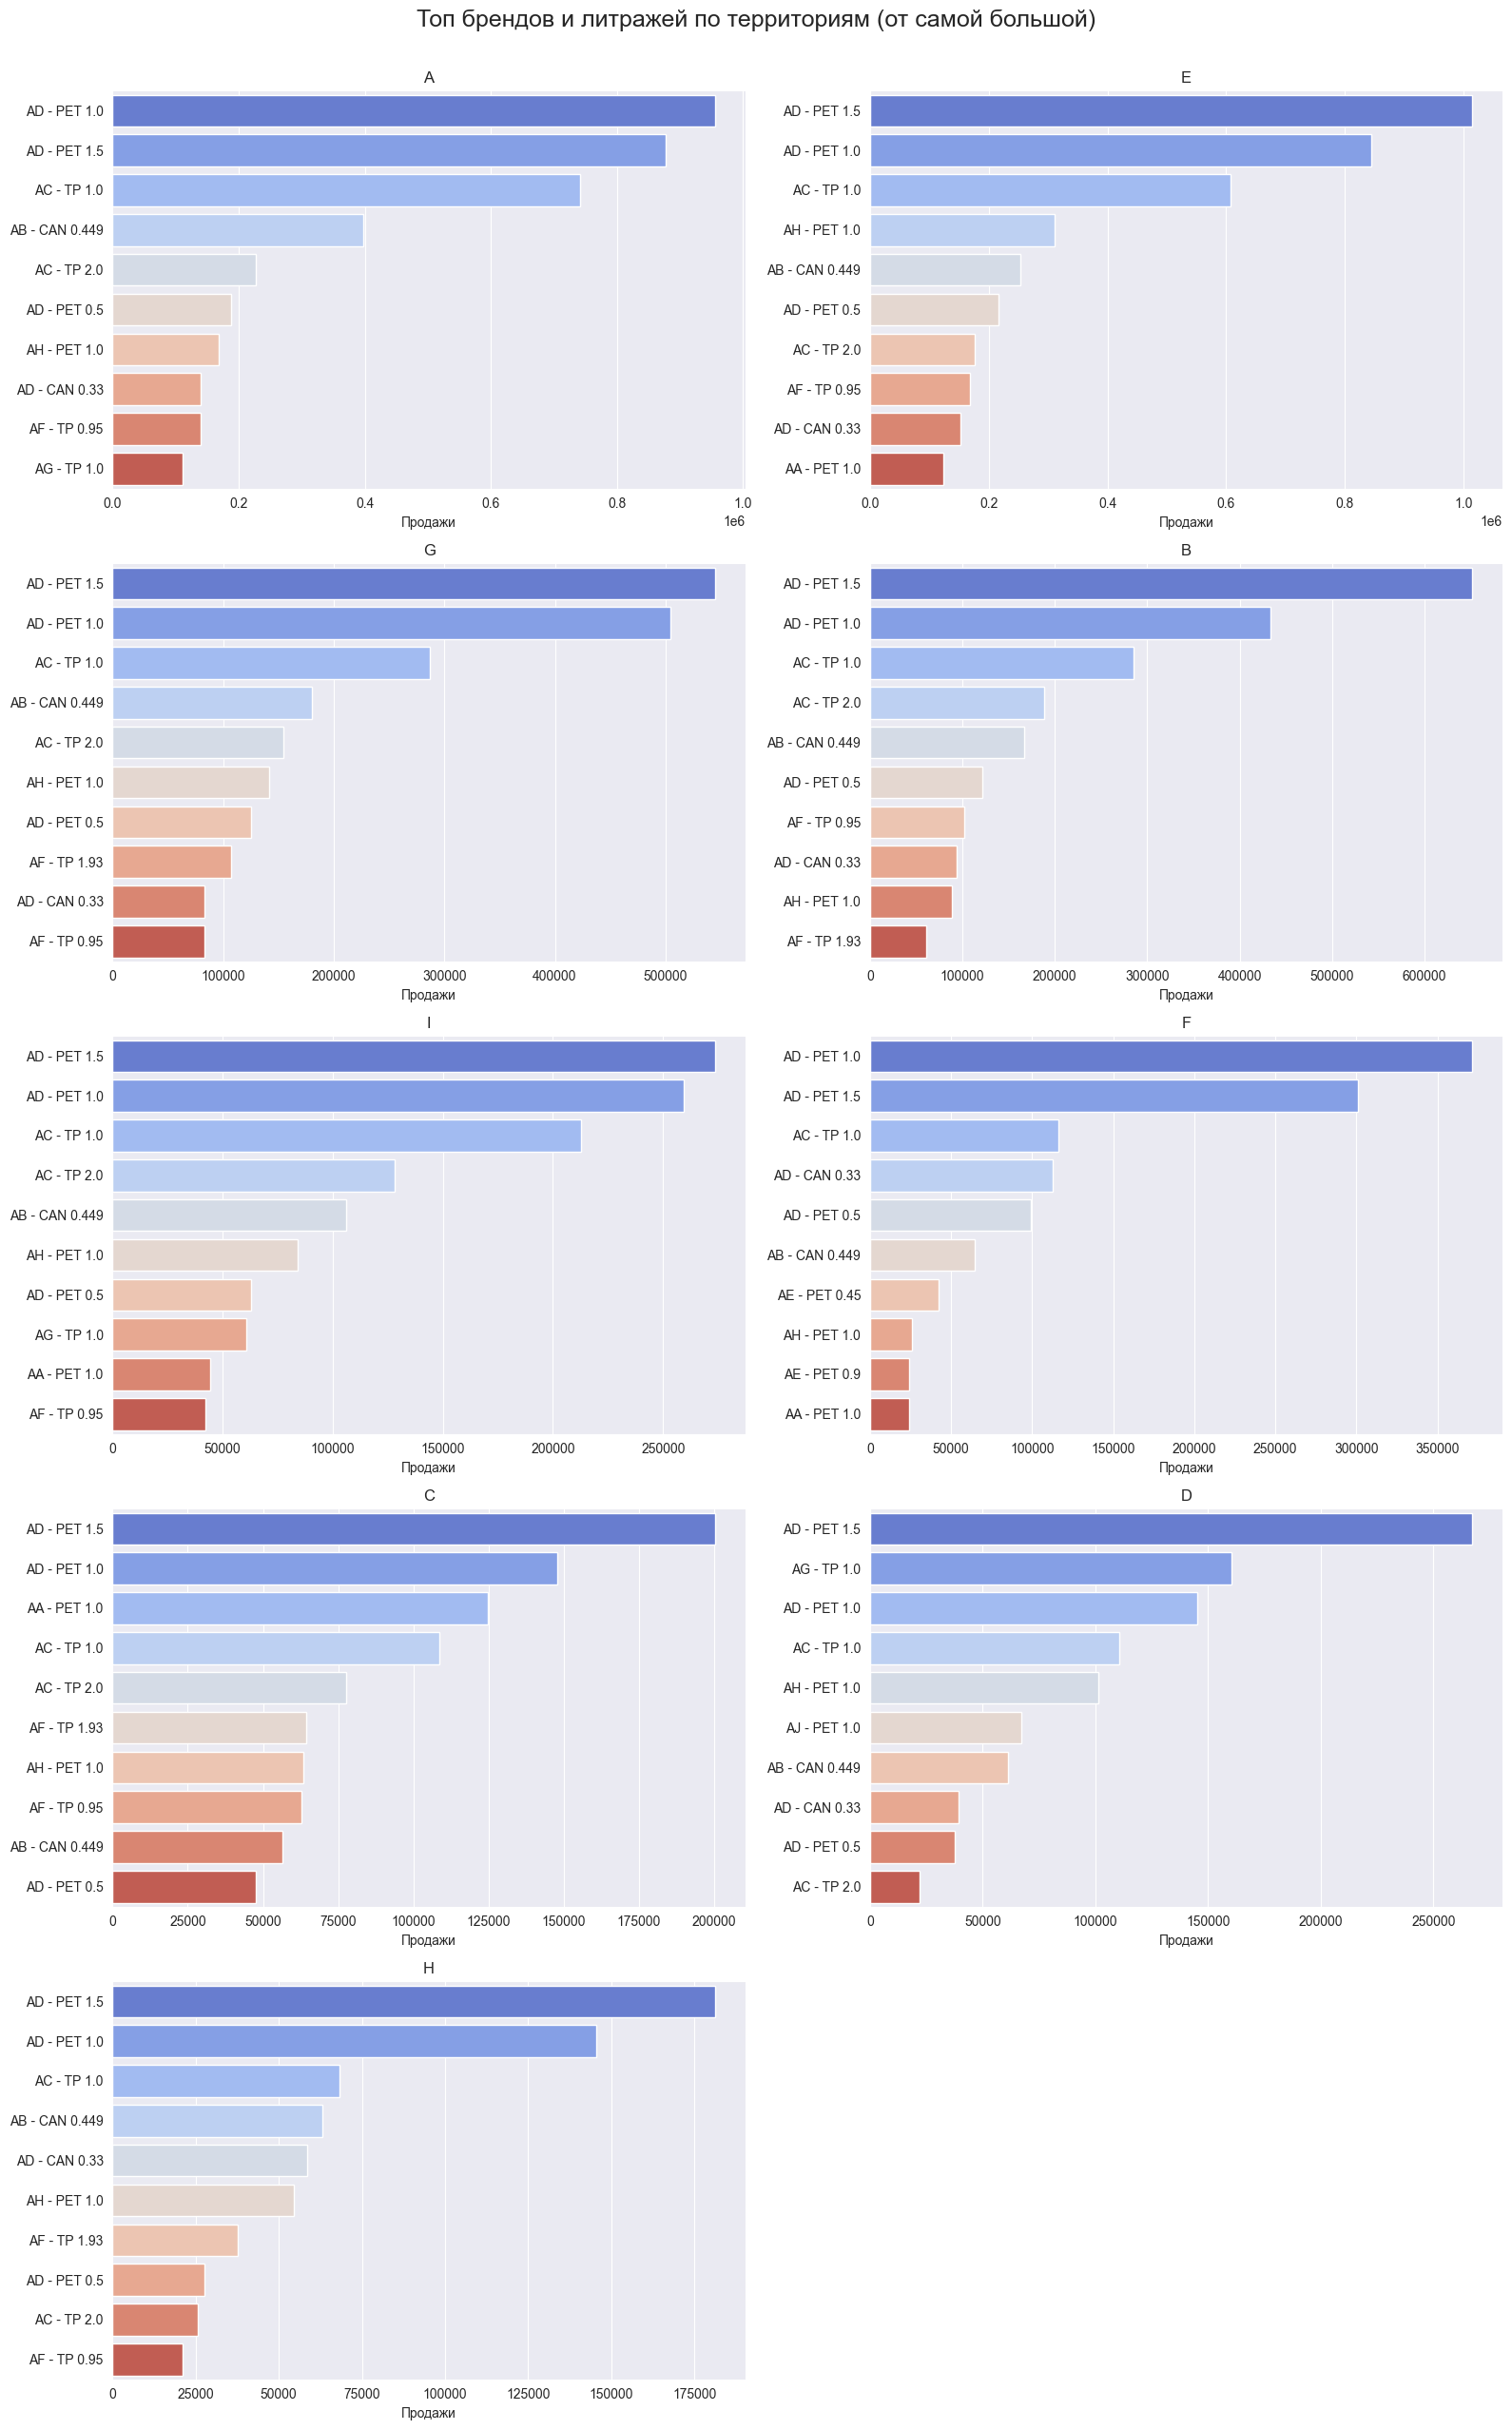

In [19]:
#считаем суммарные продажи по территориям
territory_sales = result_df.groupby('Territory_code')['fact'].sum().reset_index()

#сортируем территории по объему продаж
territory_sales = territory_sales.sort_values('fact', ascending=False)
territories_sorted = territory_sales['Territory_code'].values

#строим сетку
n_cols = 2
n_rows = (len(territories_sorted) + 1) // n_cols  # на 2 колонки

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

for i, territory in enumerate(territories_sorted):
    ax = axes[i]

    #фильтрация по территории
    territory_df = result_df[result_df['Territory_code'] == territory]
    
    #группировка по бренду и литражу
    brand_package_sales = territory_df.groupby(['Brand_code', 'Package'])['fact'].sum().reset_index()
    brand_package_sales = brand_package_sales.sort_values('fact', ascending=False).head(10)
    brand_package_sales['Brand_Package'] = brand_package_sales['Brand_code'] + ' - ' + brand_package_sales['Package'].astype(str)

    #построение графика
    sns.barplot(
        data=brand_package_sales,
        x='fact',
        y='Brand_Package',
        ax=ax,
        palette='coolwarm'
    )
    ax.set_title(f'{territory}')
    ax.set_xlabel('Продажи')
    ax.set_ylabel('')

#убираем пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Топ брендов и литражей по территориям (от самой большой)', y=1.02, fontsize=18)
plt.show()

Проанализировав графики можно сделать вывод, что в целом на каждой территории продажи ассортимента совпадают с продажами ассортимента в целом, но в ряде территорий есть несколько не типичных ситуаций, когда ассортимент продается гораздо больше нежели в топе. Это означает, что у каждого региона есть свои специфические продажи и верно построенный прогноз - залог правильного распределения продукта

C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\2096884474.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


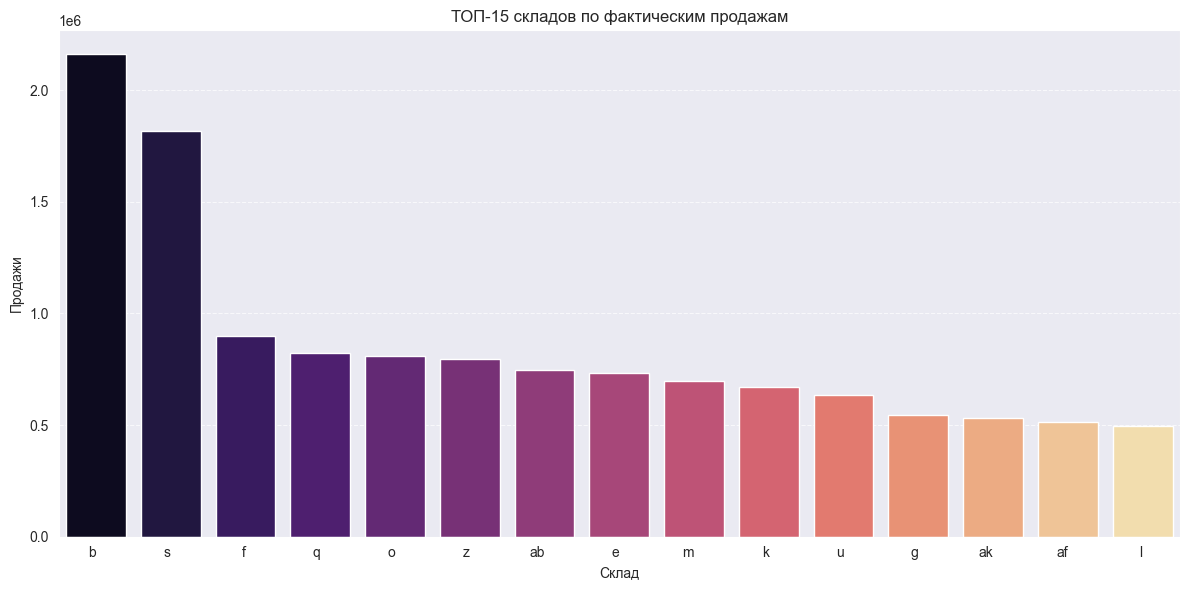

In [20]:
#группировка по складу
plant_sales = result_df.groupby('Plant_code')['fact'].sum().reset_index()

#сортировка
plant_sales = plant_sales.sort_values('fact', ascending=False)

#берем топ-N складов
top_n = 15
plant_sales_top = plant_sales.head(top_n)

#построение barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plant_sales_top,
    x='Plant_code',
    y='fact',
    palette='magma'
)

plt.xticks( ha='right')
plt.xlabel('Склад')
plt.ylabel('Продажи')
plt.title(f'ТОП-{top_n} складов по фактическим продажам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

На графике можно увидеть, что явно выделяются 2 склада, с которых идет больше всего продаж. Для таких складов, у кого большой обьем важным критерием правильного прогноза является избежание ситуации, что прогноз на продукт недозаложен. Тк отсутствие продукции может повлечь за собой потерю или сдвиг даты продаж, а также могут возникнуть дополнительные траты в случае экстренного перемещения продукции на данные площадки

C:\Users\Anton\AppData\Local\Temp\ipykernel_12372\3195210286.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


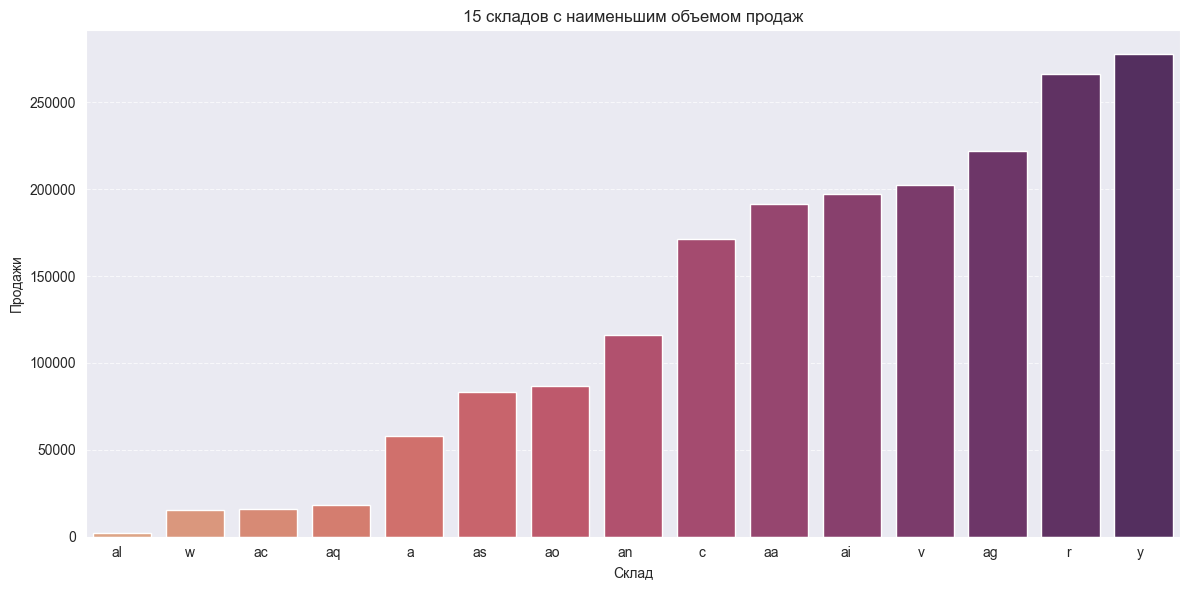

In [21]:
# Сортировка по ВОЗРАСТАНИЮ
plant_sales_least = plant_sales.sort_values('fact', ascending=True).head(15)

# Построение barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plant_sales_least,
    x='Plant_code',
    y='fact',
    palette='flare'  # можно заменить на другую палитру
)

plt.xticks(ha='right')
plt.xlabel('Склад')
plt.ylabel('Продажи')
plt.title('15 складов с наименьшим объемом продаж')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

А если обратить внимание на топ 15 самых не объемных складов, то при построении прогноза важно не перезаложить обьем, чтобы не привезти "лишнего" товара, который потом очень долго может продаваться, что может повлечь за собой риски списания продукции

Анализ временных рядов

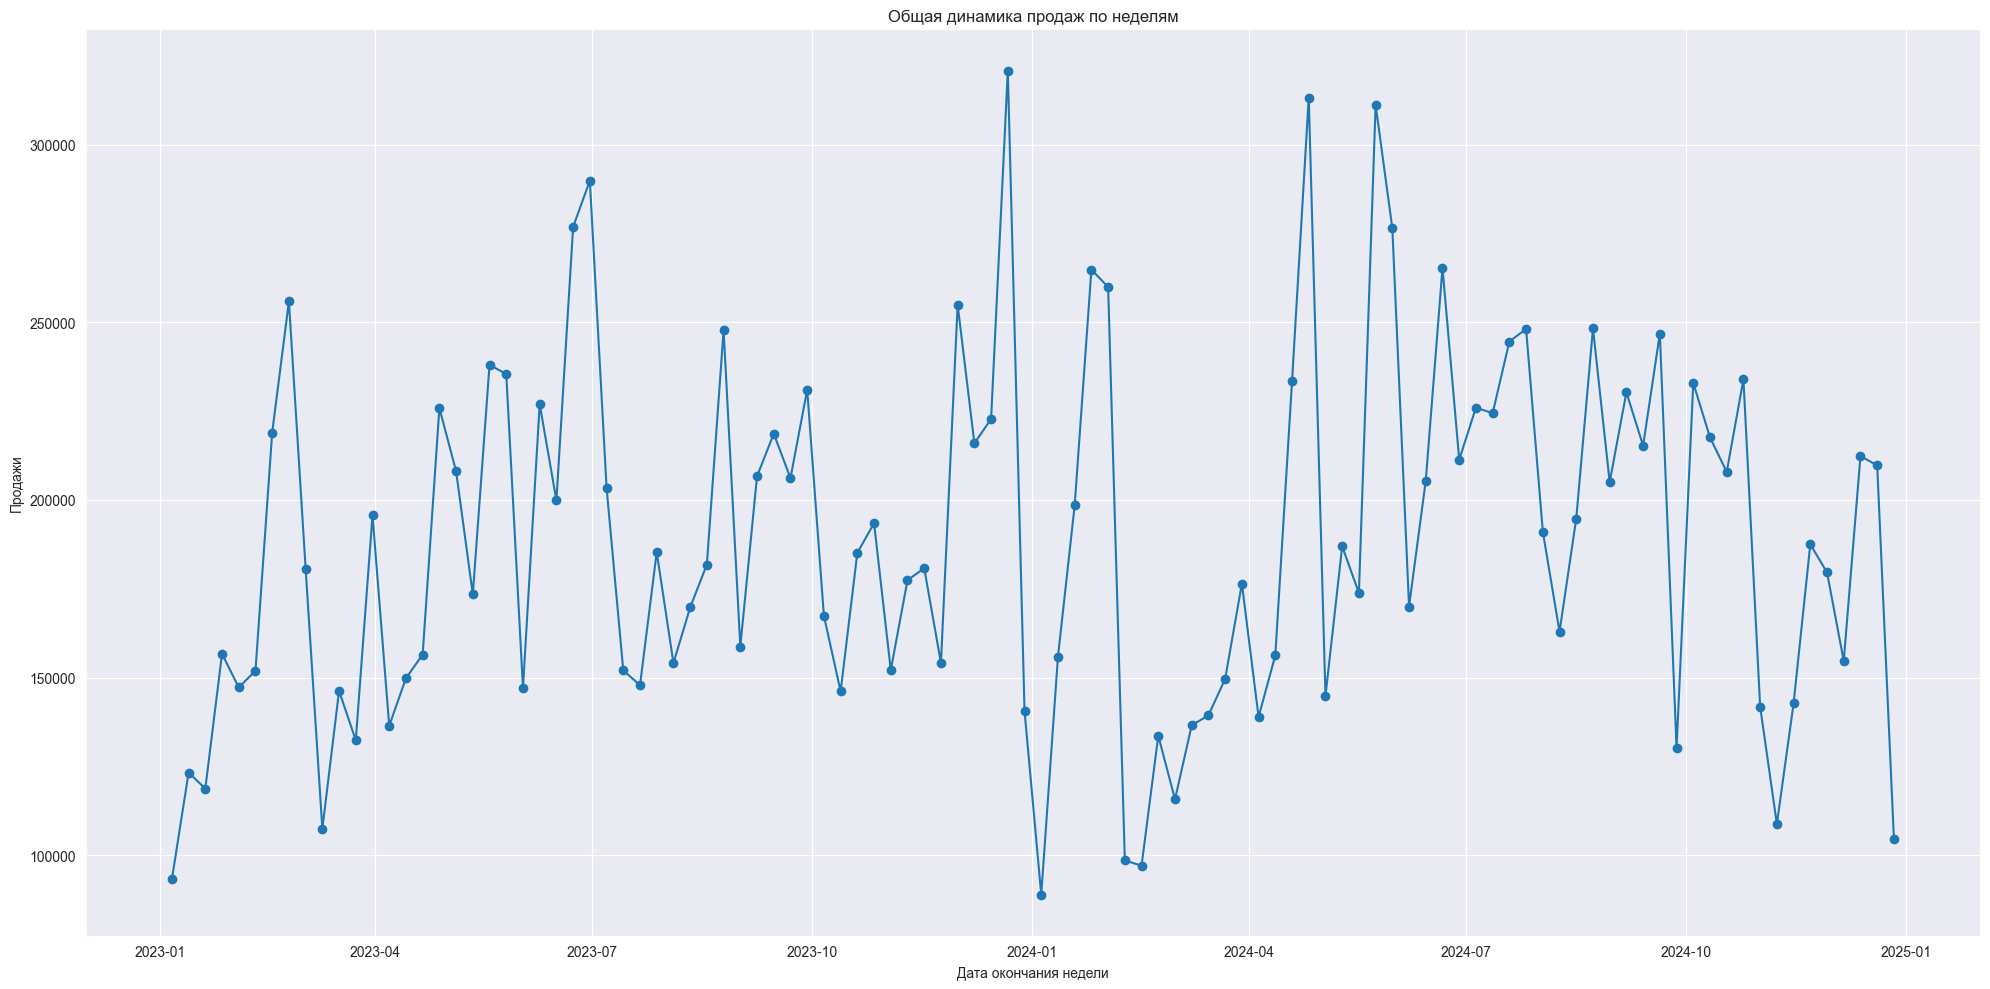

In [22]:
# Группируем и строим график
weekly_sales = result_df.groupby('Week_End_Date')['fact'].sum()

plt.figure(figsize=(20, 10))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o')
plt.title('Общая динамика продаж по неделям')
plt.xlabel('Дата окончания недели')
plt.ylabel('Продажи')
plt.grid(True)
plt.tight_layout()
plt.show()

дописать анализ

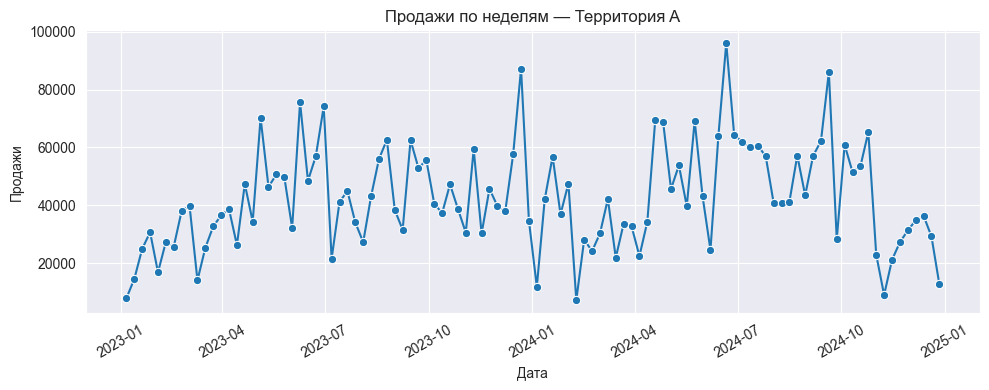

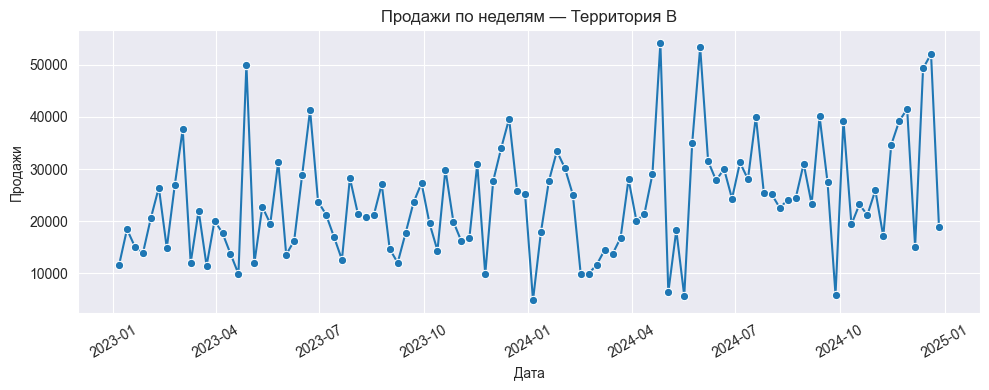

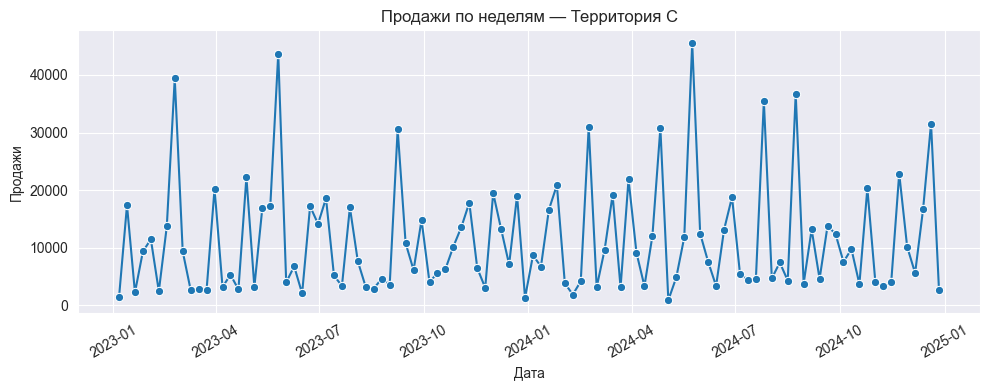

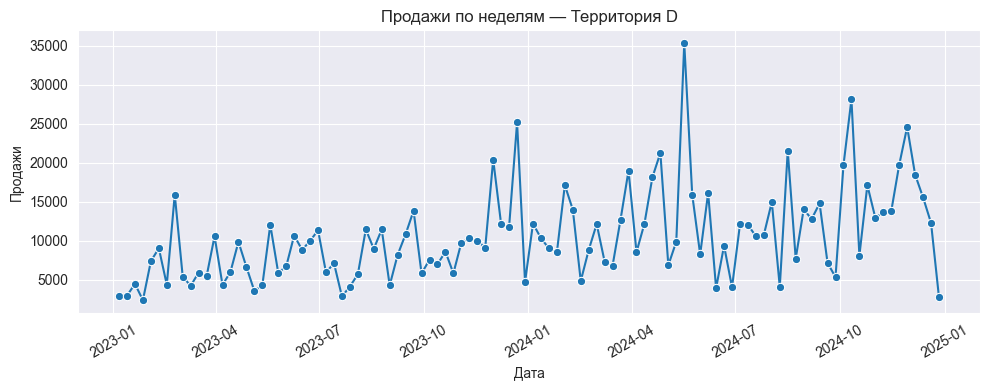

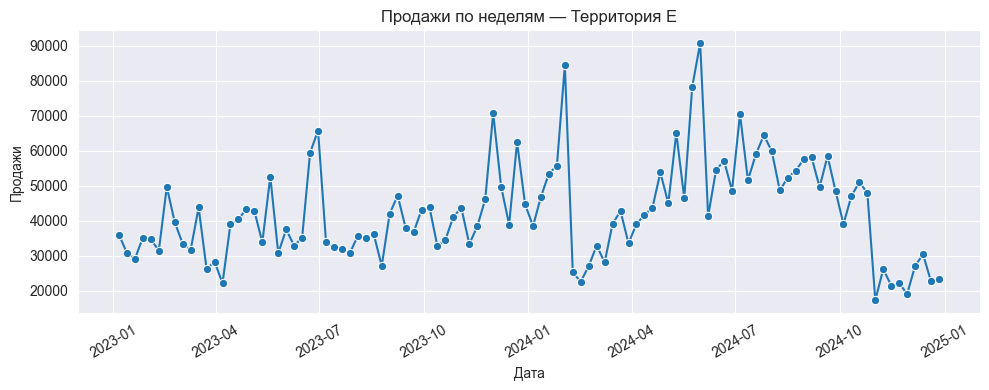

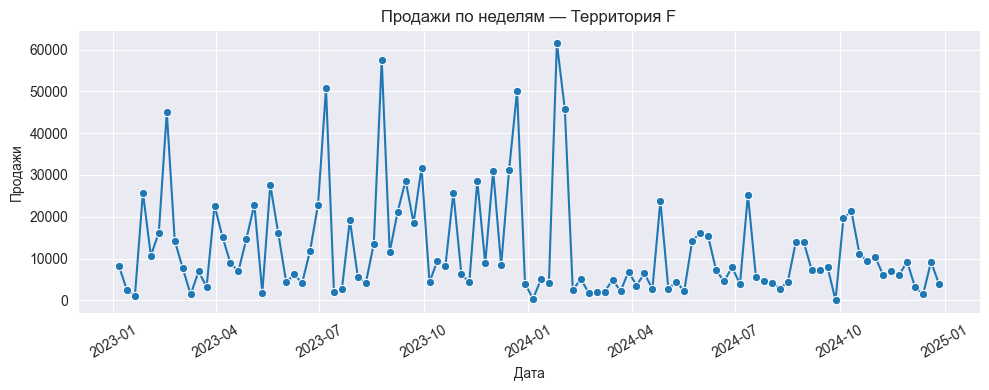

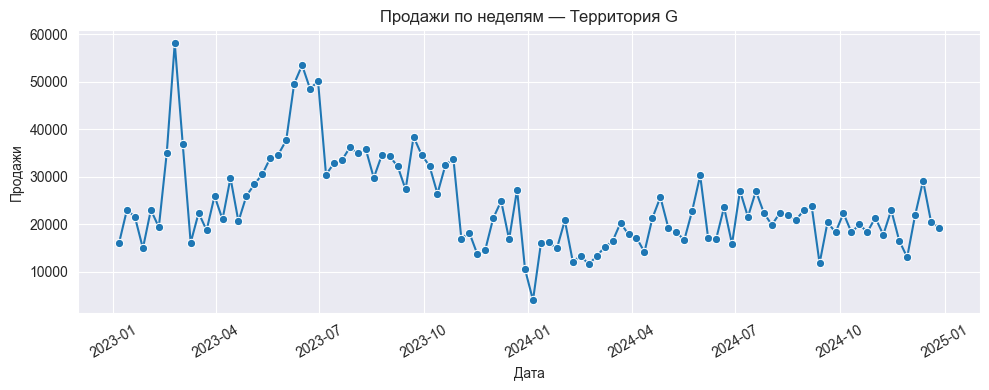

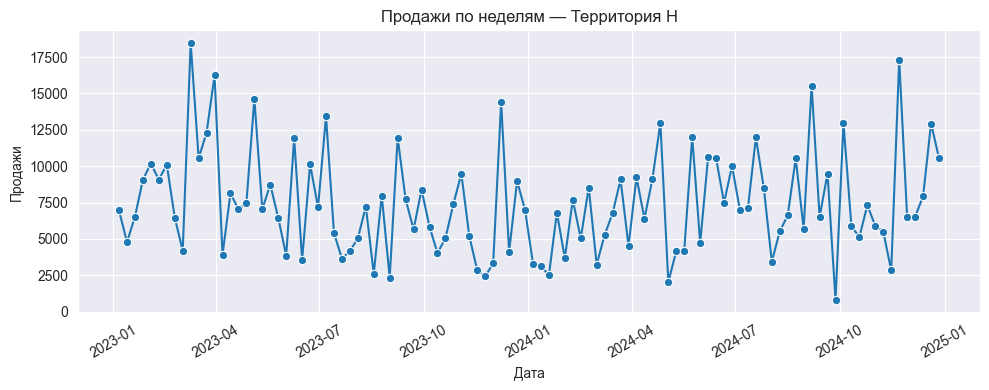

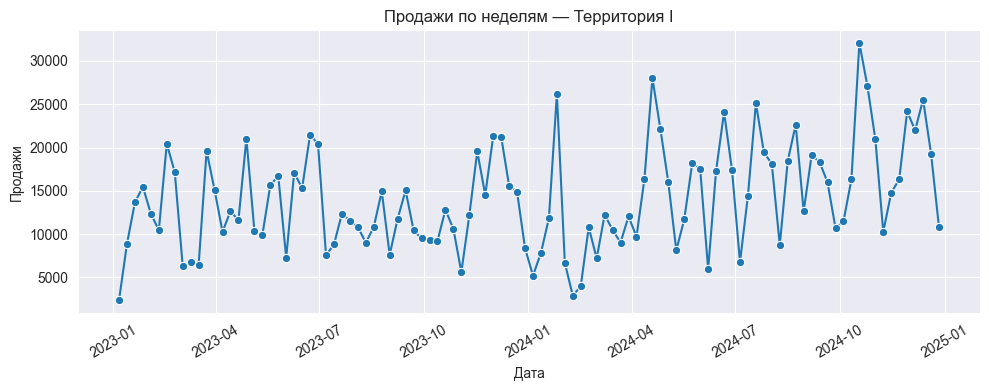

In [23]:
# Получаем список уникальных территорий
territories_1 = result_df['Territory_code'].unique()

# Создаем новый датафрейм с агрегированными данными по неделям и территориям
weekly_df = (
    result_df
    .groupby(['Territory_code', 'Week_End_Date'])['fact']
    .sum()
    .reset_index()
)

# Выбираем до 10 территорий для примера
territories_to_plot = territories_1[:10]

# Строим отдельный график для каждой территории
for territory in territories_to_plot:
    data = weekly_df[weekly_df['Territory_code'] == territory]

    plt.figure(figsize=(10, 4))
    sns.lineplot(data=data, x='Week_End_Date', y='fact', marker='o')
    plt.title(f"Продажи по неделям — Территория {territory}")
    plt.xlabel("Дата")
    plt.ylabel("Продажи")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

дописать анализ

In [24]:
from statsmodels.tsa.seasonal import STL

Анализ STL
Начнем с сезонности

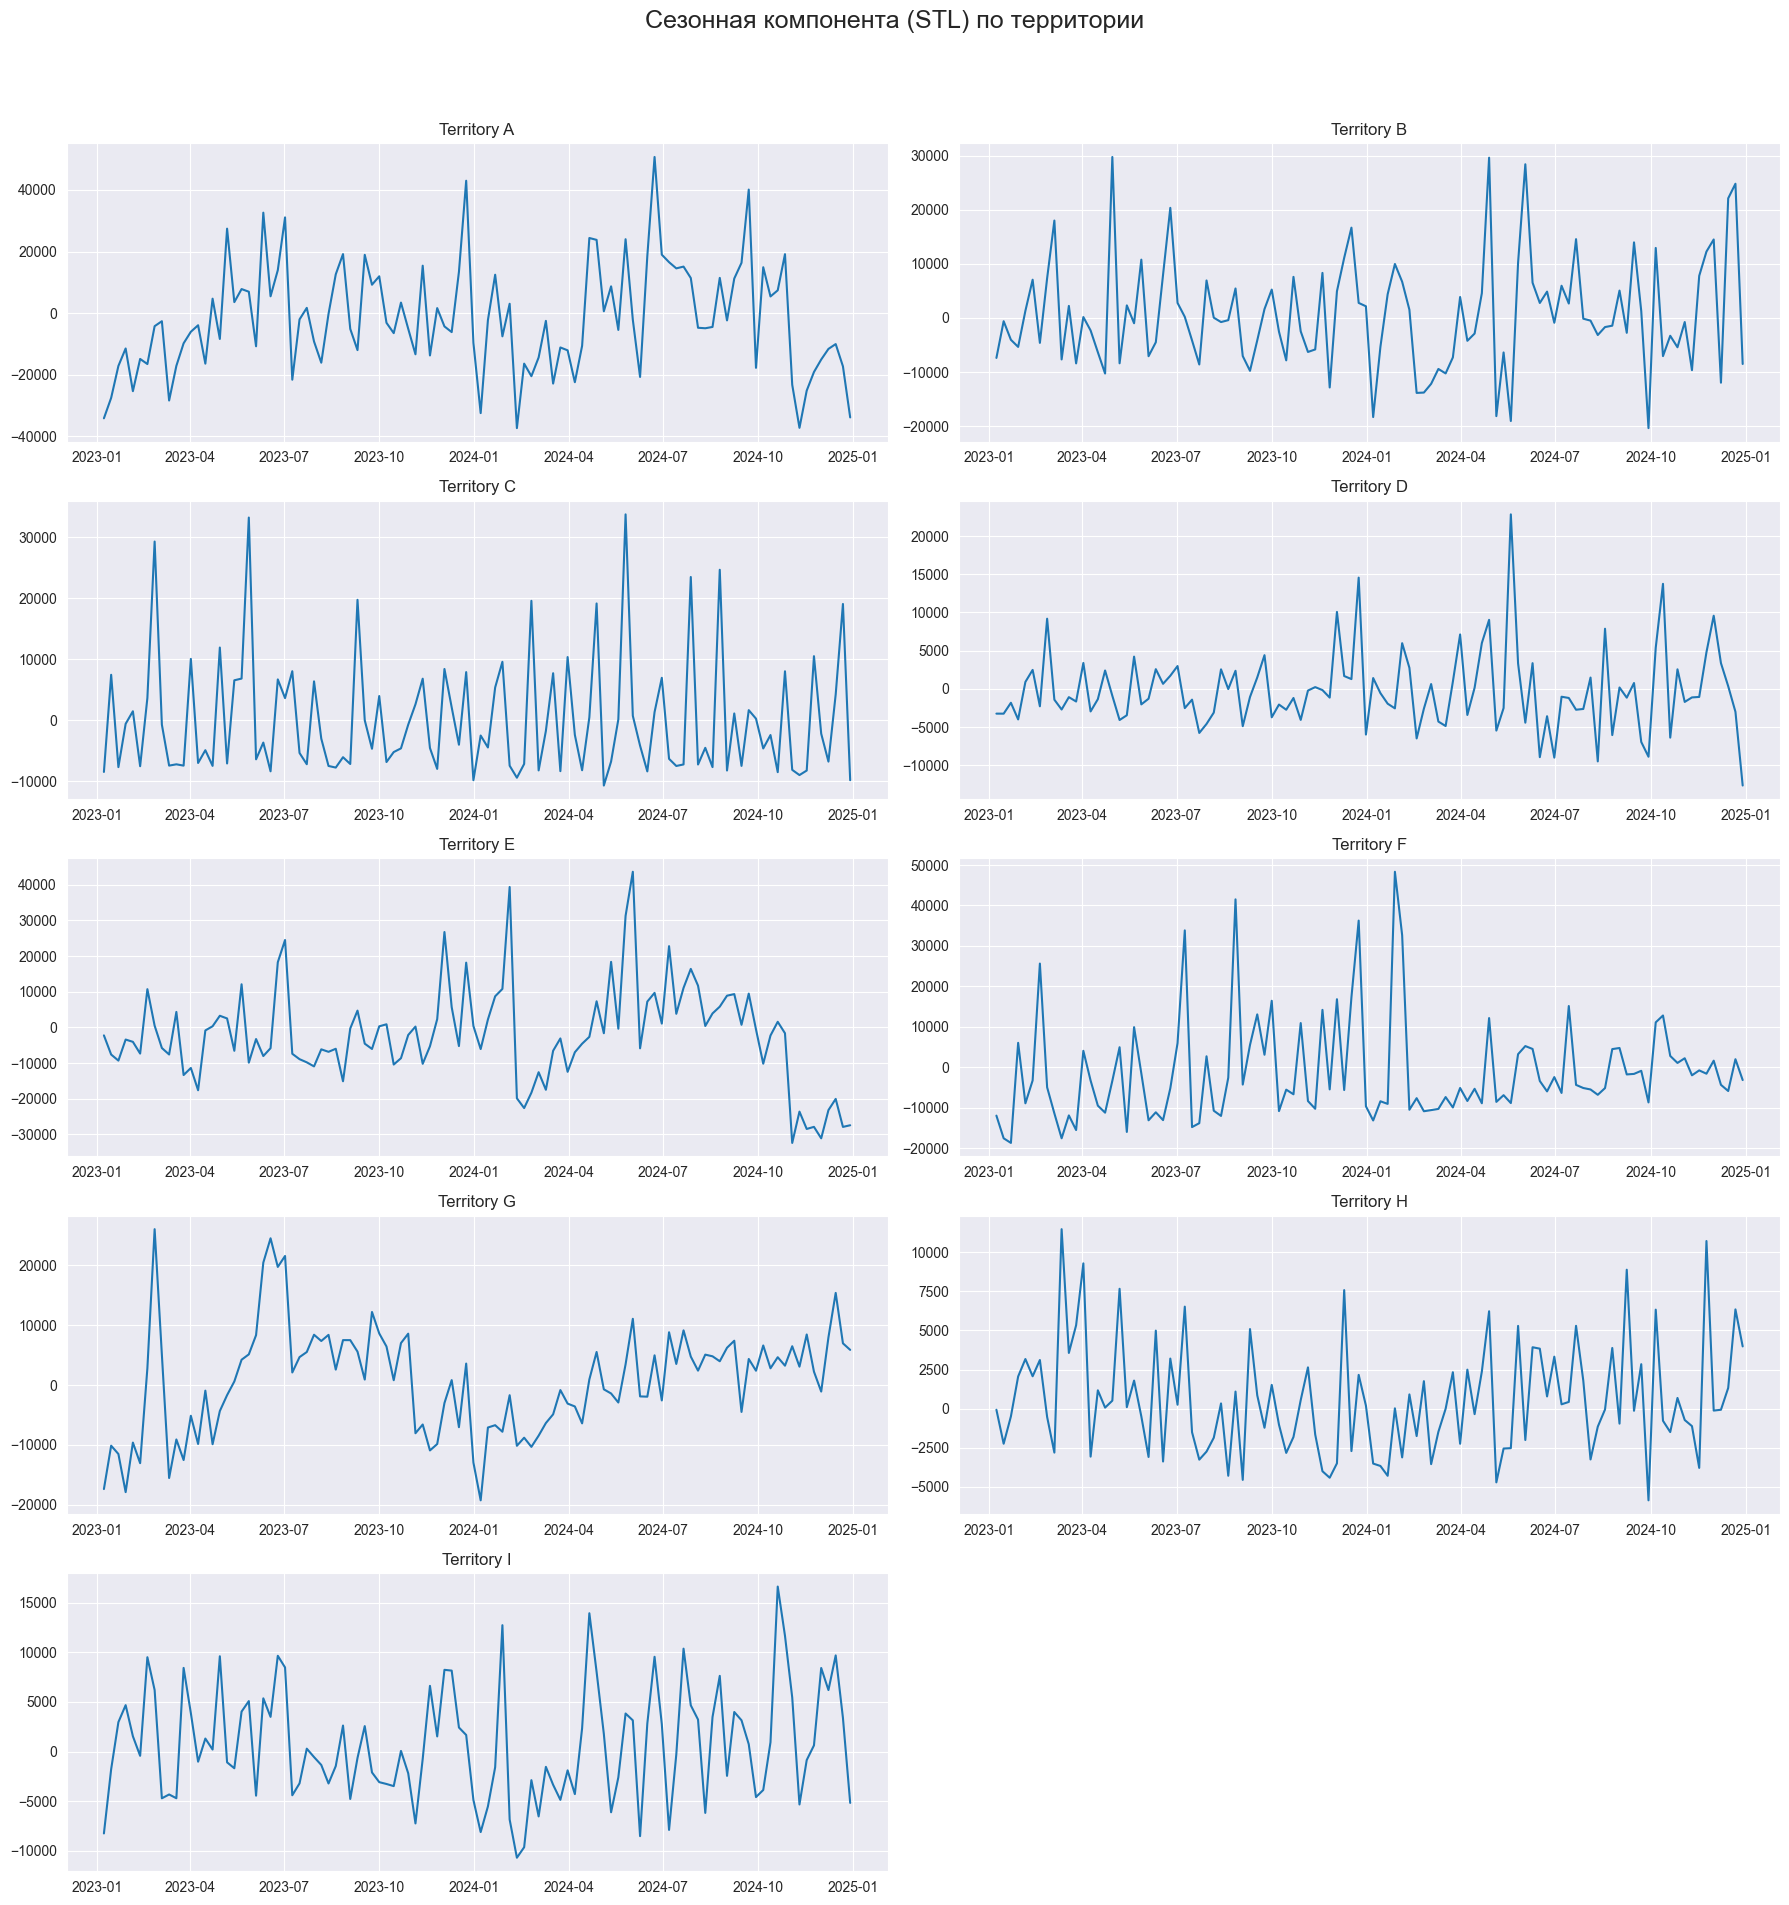

In [25]:
# Настраиваем сетку графиков: 2 в ширину, 5 в высоту
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

for i, territory in enumerate(territories_1):
    # Создание равномерного временного ряда с агрегацией по неделям
    ts = (
        result_df[result_df['Territory_code'] == territory]
        .set_index('Week_End_Date')
        .resample('W')['fact']  # автоматически по неделям
        .sum()
        .fillna(0)
    )

    # Применяем STL-декомпозицию
    try:
        stl = STL(ts, seasonal=13)
        result = stl.fit()

        # Визуализация только сезонной компоненты
        axes[i].plot(result.seasonal.index, result.seasonal, label='Сезонность')
        axes[i].set_title(f"Territory {territory}")
        axes[i].grid(True)

    except Exception as e:
        axes[i].text(0.5, 0.5, f"Ошибка: {e}", ha='center', va='center')
        axes[i].set_title(f"Territory {territory} — ошибка")

# Удаляем лишние графики, если территорий < 10
for j in range(len(territories_1), 10):
    fig.delaxes(axes[j])

plt.suptitle("Сезонная компонента (STL) по территории", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

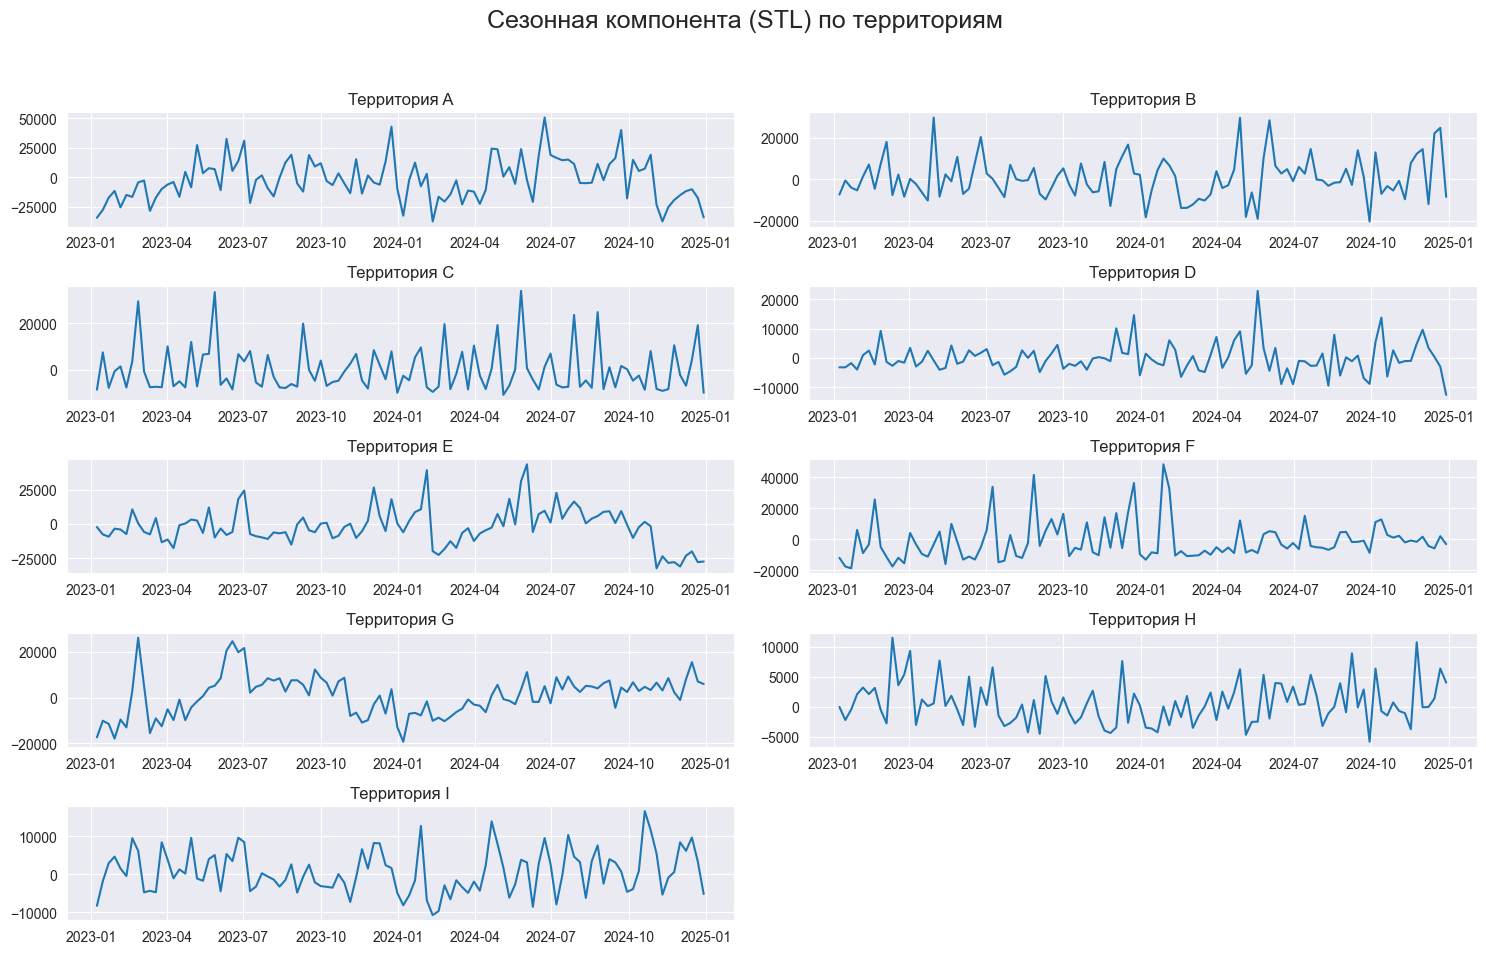

In [26]:
# Настраиваем сетку графиков: 2 строки, 5 столбцов (10 графиков)
fig, axes = plt.subplots(5, 2, figsize=(15, 10))
axes = axes.flatten()

# Обходим первые 10 территорий
for i, territory in enumerate(territories_1[:10]):
    try:
        # Получаем временной ряд по территории и неделям
        ts = (
            result_df[result_df['Territory_code'] == territory]
            .set_index('Week_End_Date')
            .resample('W')['fact']
            .sum()
            .fillna(0)
        )
        ts.index = pd.to_datetime(ts.index)

        # Применяем STL-декомпозицию
        stl = STL(ts, seasonal=13)
        result = stl.fit()

        # Рисуем сезонную компоненту
        axes[i].plot(result.seasonal.index, result.seasonal, label='Сезонность')
        axes[i].set_title(f"Территория {territory}")
        axes[i].grid(True)

    except Exception as e:
        # Отображаем ошибку на графике, если что-то пошло не так
        axes[i].text(0.5, 0.5, f"Ошибка: {e}", ha='center', va='center')
        axes[i].set_title(f"Территория {territory} — ошибка")

# Удаляем лишние графики, если территорий меньше 10
for j in range(len(territories_1), 10):
    fig.delaxes(axes[j])

# Заголовок и отступы
fig.suptitle("Сезонная компонента (STL) по территориям", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Отображаем
plt.show()

Дописать анализ

Теперь тренд

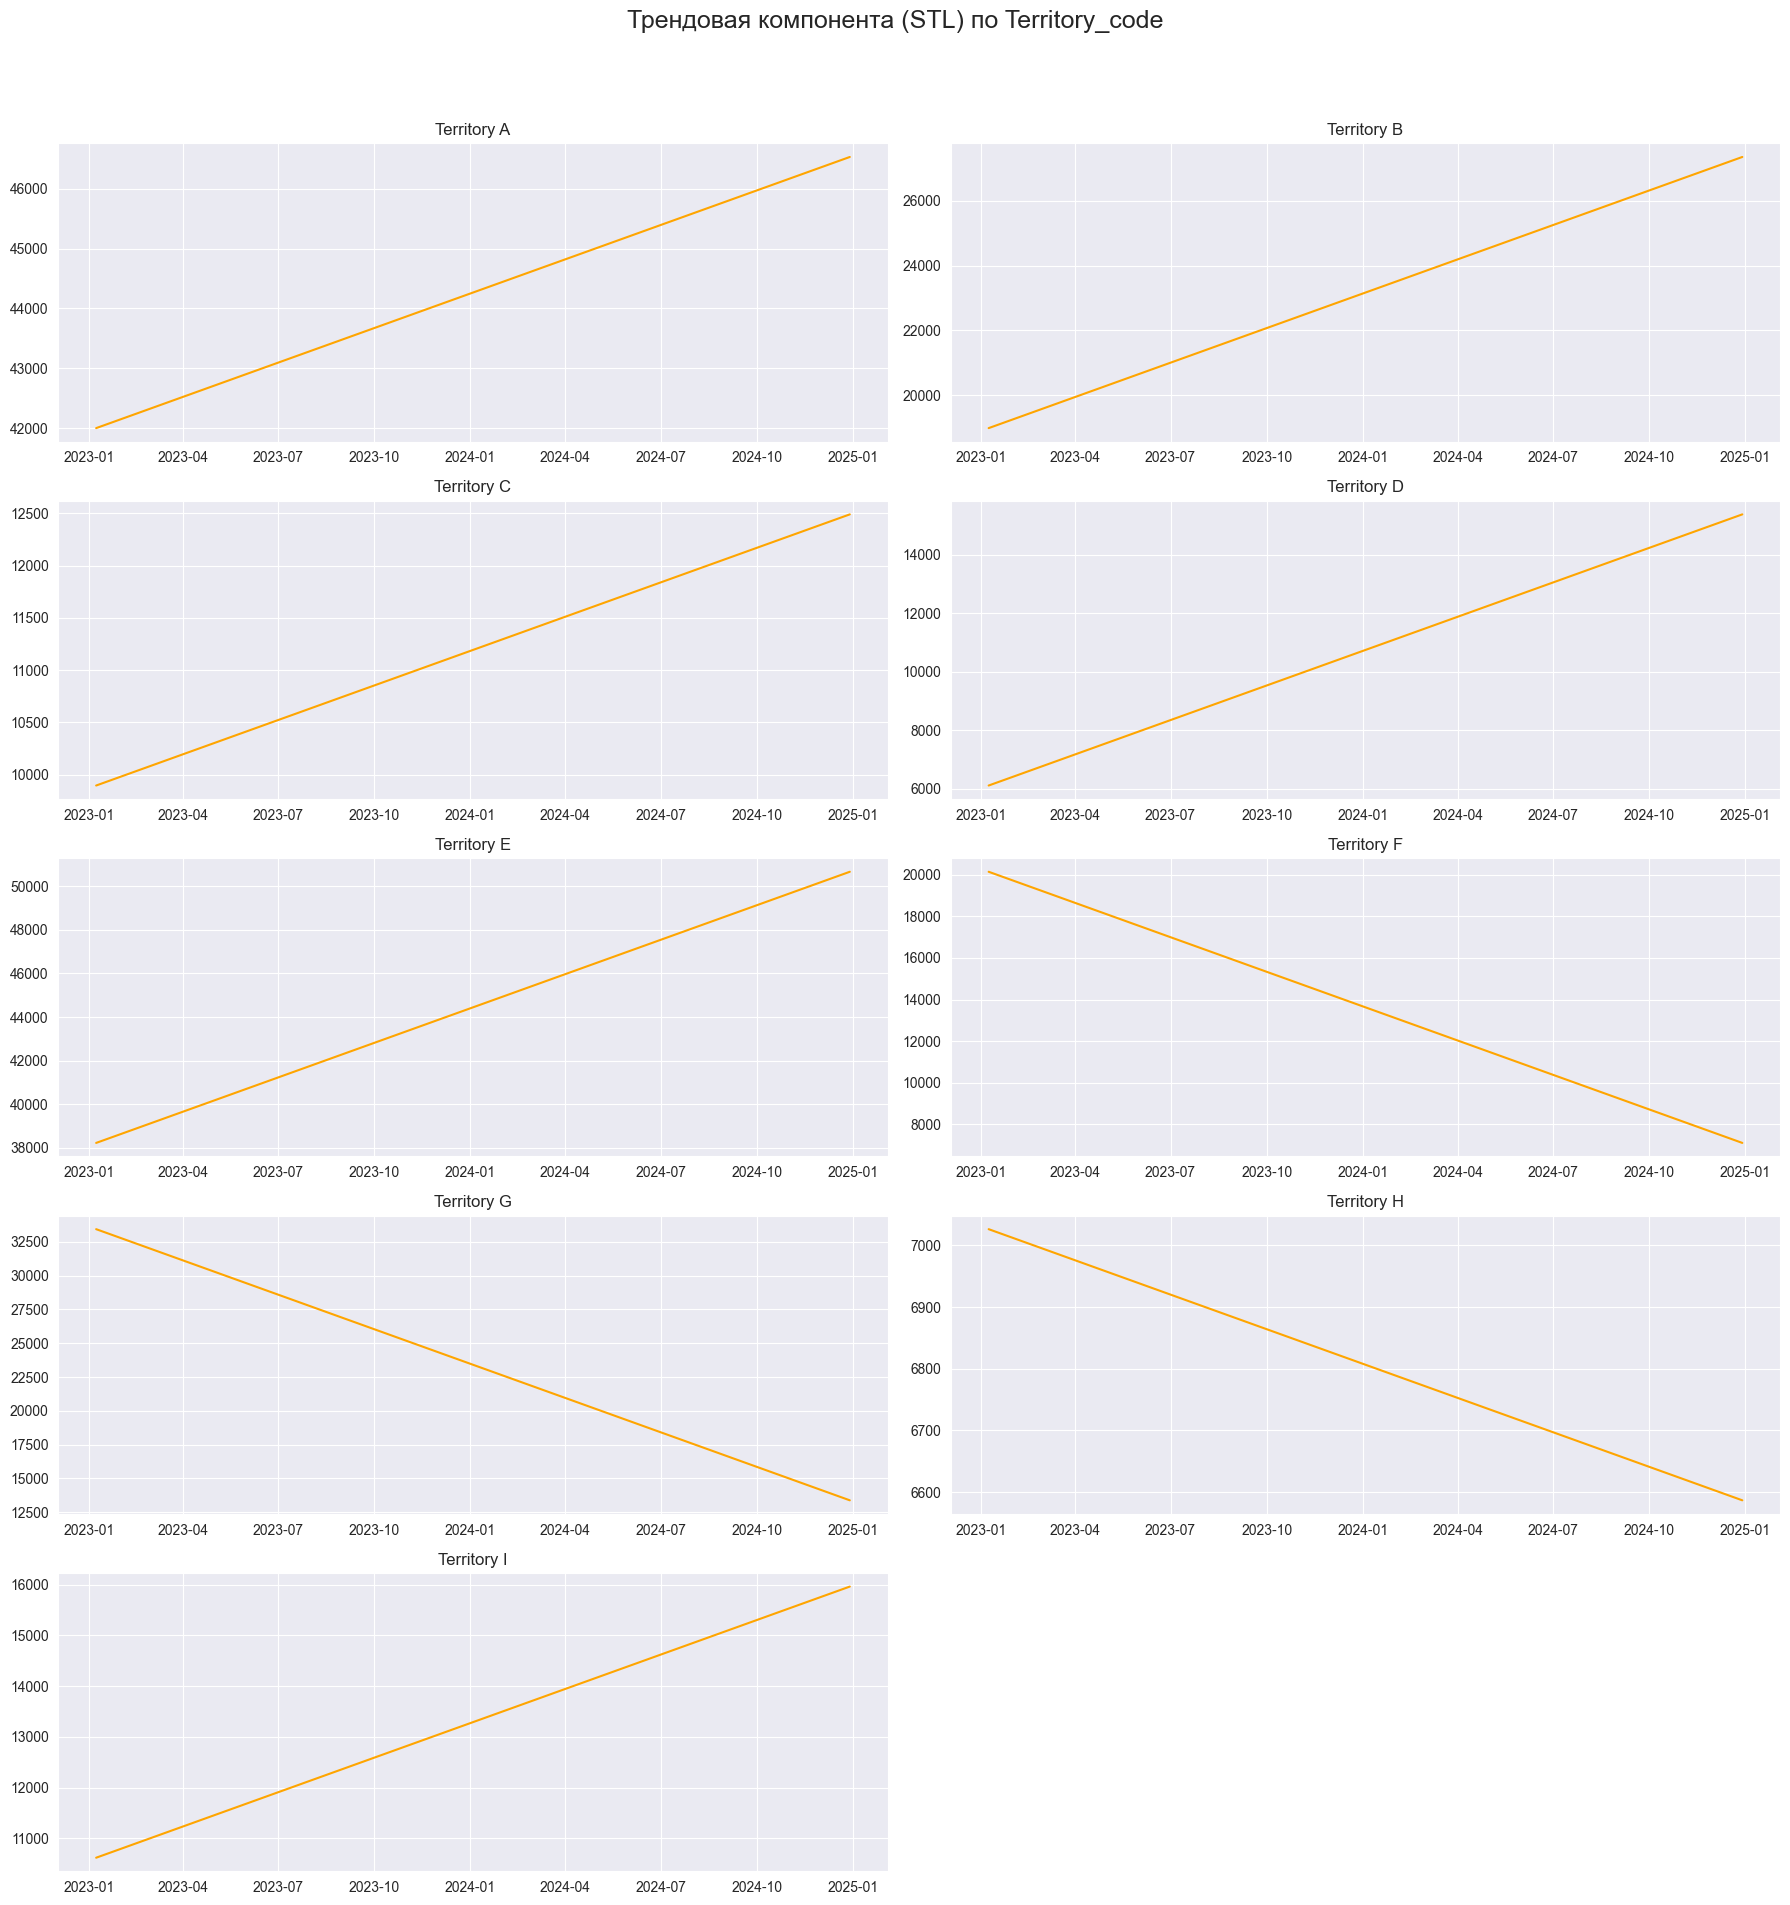

In [27]:
# Сетка графиков 5x2
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

for i, territory in enumerate(territories_1):
    ts = (
        result_df[result_df['Territory_code'] == territory]
        .set_index('Week_End_Date')
        .resample('W')['fact']
        .sum()
        .fillna(0)
    )

    try:
        stl = STL(ts, seasonal=13)
        result = stl.fit()

        # Показываем тренд
        axes[i].plot(result.trend.index, result.trend, label='Тренд', color='orange')
        axes[i].set_title(f"Territory {territory}")
        axes[i].grid(True)

    except Exception as e:
        axes[i].text(0.5, 0.5, f"Ошибка: {e}", ha='center', va='center')
        axes[i].set_title(f"Territory {territory} — ошибка")

# Убираем пустые графики
for j in range(len(territories_1), 10):
    fig.delaxes(axes[j])

plt.suptitle("Трендовая компонента (STL) по Territory_code", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Дописать анализ

Остатки

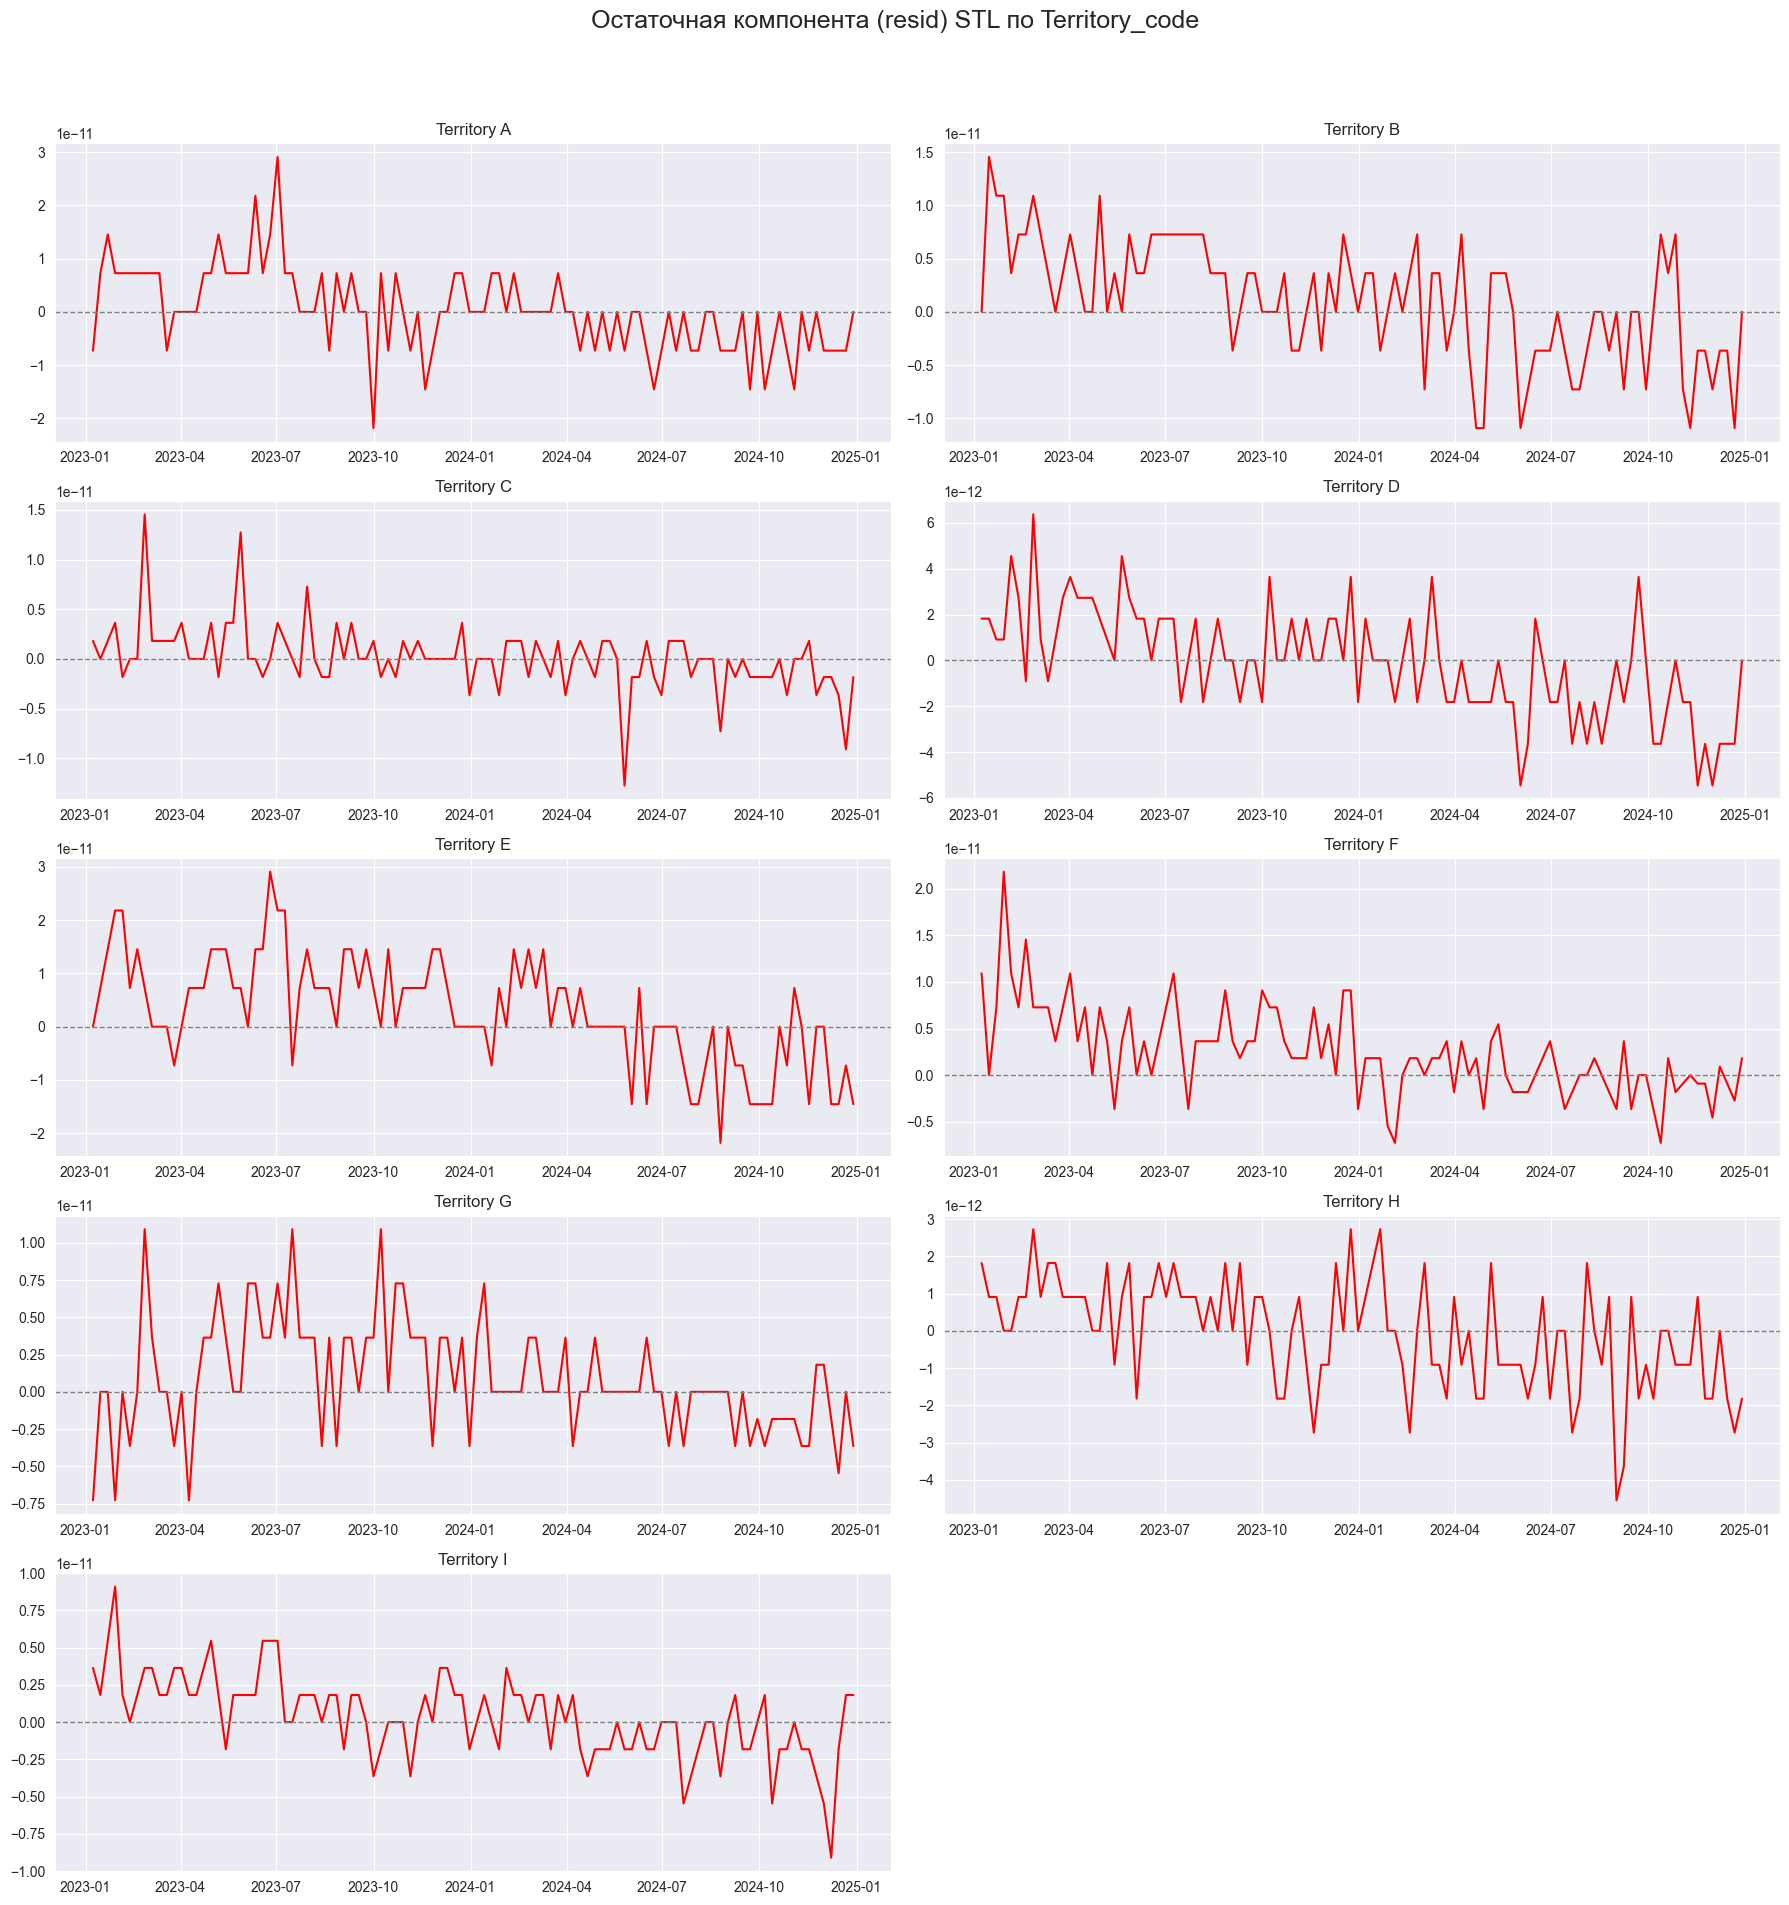

In [28]:
# Сетка 5x2
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

for i, territory in enumerate(territories_1):
    ts = (
        result_df[result_df['Territory_code'] == territory]
        .set_index('Week_End_Date')
        .resample('W')['fact']
        .sum()
        .fillna(0)
    )

    try:
        stl = STL(ts, seasonal=13)
        result = stl.fit()

        # Построение остаточной компоненты
        axes[i].plot(result.resid.index, result.resid, color='red', label='Остатки')
        axes[i].axhline(0, color='gray', linestyle='--', linewidth=1)
        axes[i].set_title(f"Territory {territory}")
        axes[i].grid(True)

    except Exception as e:
        axes[i].text(0.5, 0.5, f"Ошибка: {e}", ha='center', va='center')
        axes[i].set_title(f"Territory {territory} — ошибка")

# Удаляем пустые ячейки
for j in range(len(territories_1), 10):
    fig.delaxes(axes[j])

plt.suptitle("Остаточная компонента (resid) STL по Territory_code", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Дописать анализ

ADF-тест на стационарность

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
# Группировка всех SKU-комбинаций по продажам
all_combinations = (
    result_df
    .groupby(['Territory_code', 'Plant_code', 'Brand_code', 'Package'])['fact']
    .sum()
    .reset_index()
    .sort_values(by='fact', ascending=False)
)

# Результаты ADF
adf_results_all = []

for _, row in all_combinations.iterrows():
    territory, plant, brand, package = row[['Territory_code', 'Plant_code', 'Brand_code', 'Package']]
    
    # Формируем временной ряд
    ts = (
        result_df[
            (result_df['Territory_code'] == territory) &
            (result_df['Plant_code'] == plant) &
            (result_df['Brand_code'] == brand) &
            (result_df['Package'] == package)
        ]
        .set_index('Week_End_Date')
        .resample('W')['fact']
        .sum()
        .fillna(0)
    )

    # Пропускаем слишком короткие или пустые ряды
    if len(ts.dropna()) < 10 or ts.sum() == 0:
        continue

    # ADF-тест
    adf_result = adfuller(ts)
    adf_stat, p_value, crit = adf_result[0], adf_result[1], adf_result[4]
    is_stationary = p_value < 0.05

    adf_results_all.append({
        "Combination": f"{territory}-{plant}-{brand}-{package}",
        "ADF Statistic": adf_stat,
        "p-value": p_value,
        "Is Stationary": is_stationary
    })

# В таблицу
adf_all_df = pd.DataFrame(adf_results_all).sort_values(by='p-value').reset_index(drop=True)

# Выводим только топ-10 по стационарности
adf_all_df.head(10)

,Combination,ADF Statistic,p-value,Is Stationary
0,G-ac-AD-PET 1.0,-36.705351,0.000000e+00,True
1,G-ac-AE-PET 0.9,-34.859237,0.000000e+00,True
2,G-ac-AB-CAN 0.449,-28.991212,0.000000e+00,True
3,C-ap-AI-CAN 0.33,-15.495800,2.451477e-28,True
4,B-i-AC-TP 0.2,-11.968921,3.940200e-22,True
5,A-c-AD-CAN 0.33,-11.838452,7.690563e-22,True
6,A-c-AD-PET 0.5,-11.831506,7.971052e-22,True
7,I-al-AD-PET 0.5,-11.802882,9.241212e-22,True
8,H-ah-AA-PET 1.0,-11.796502,9.551286e-22,True
9,C-m-AH-PET 1.0,-11.723374,1.396124e-21,True


In [31]:
adf_all_df

,Combination,ADF Statistic,p-value,Is Stationary
0,G-ac-AD-PET 1.0,-36.705351,0.000000e+00,True
1,G-ac-AE-PET 0.9,-34.859237,0.000000e+00,True
2,G-ac-AB-CAN 0.449,-28.991212,0.000000e+00,True
3,C-ap-AI-CAN 0.33,-15.495800,2.451477e-28,True
4,B-i-AC-TP 0.2,-11.968921,3.940200e-22,True
...,...,...,...,...
861,B-i-AC-TP 2.0,0.681081,9.894526e-01,False
862,D-n-AD-PET 0.3,0.690328,9.896429e-01,False
863,A-b-AD-PET 0.3,1.132180,9.954821e-01,False
864,B-l-AJ-PET 1.0,2.103973,9.987937e-01,False


Построение ACF и PACF для первых 5 стационарных SKU-комбинаций

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

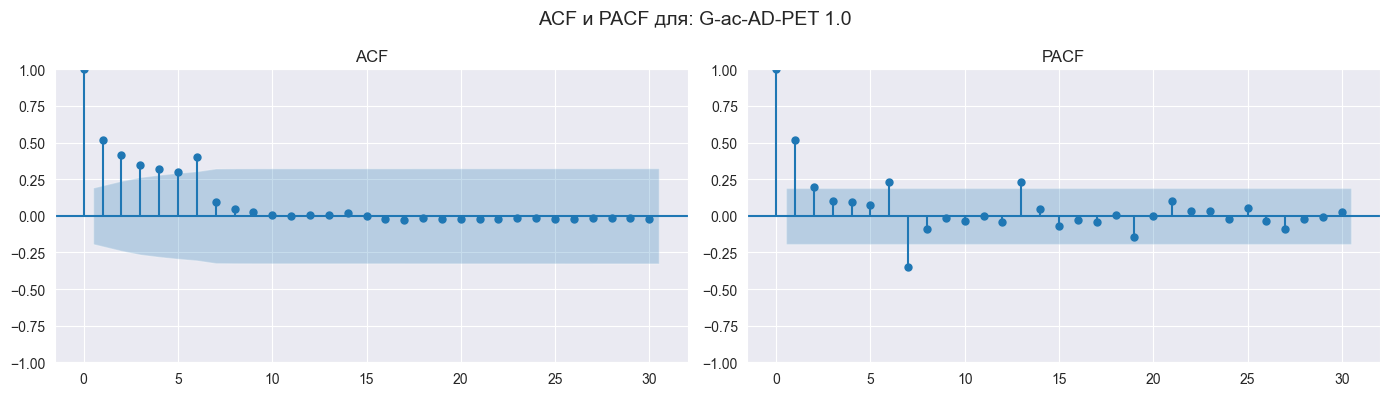

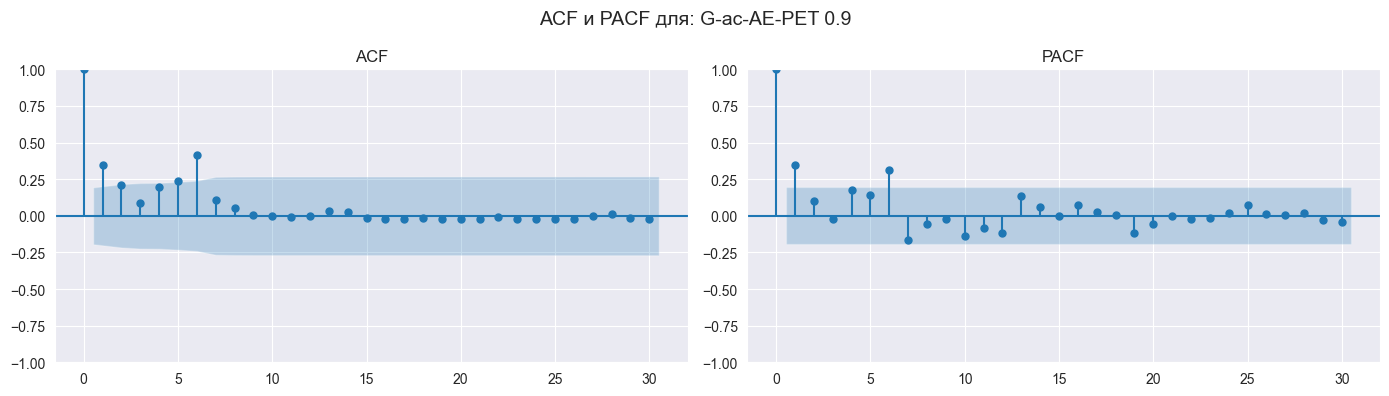

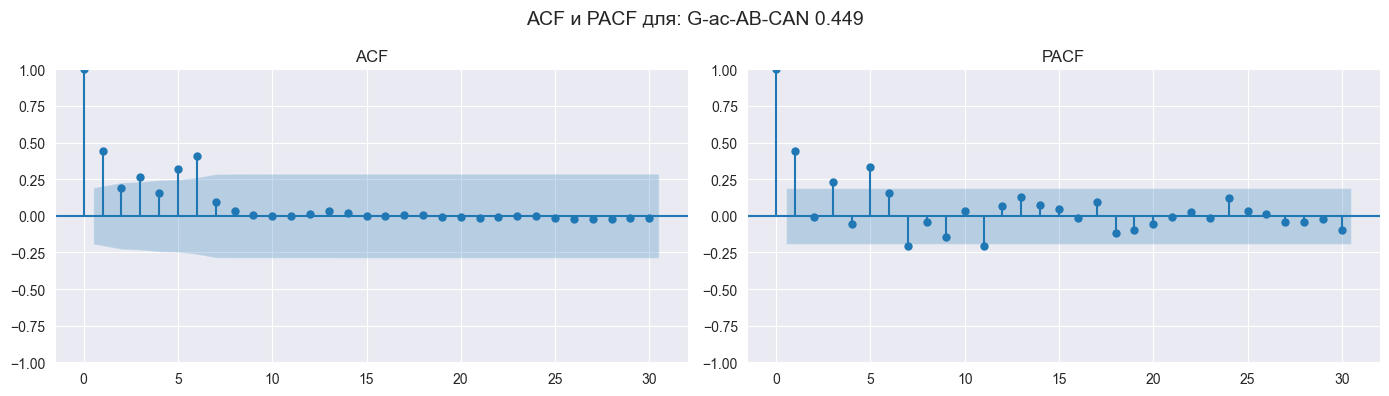

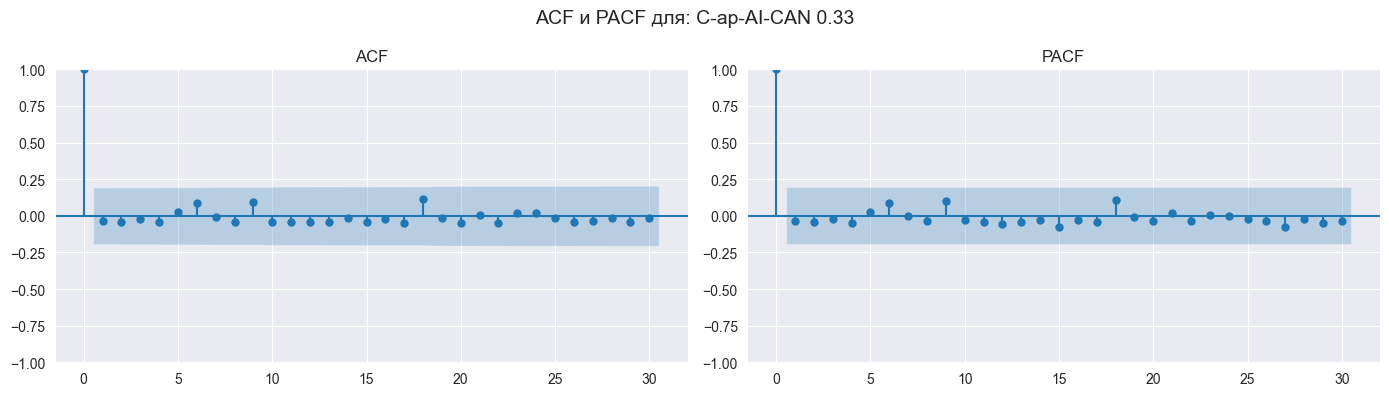

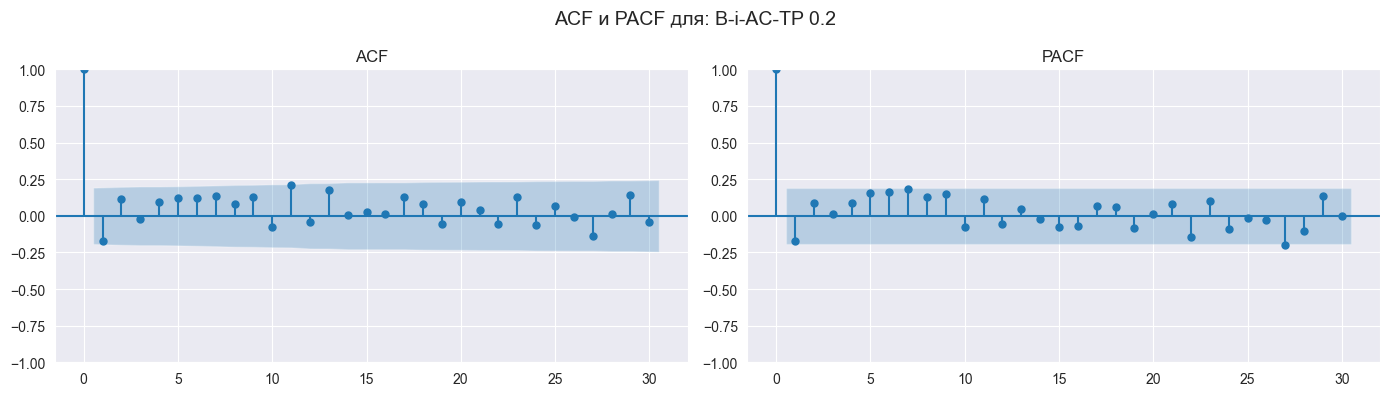

In [33]:
# Отбираем только стационарные комбинации
stationary_combinations = adf_all_df[adf_all_df["Is Stationary"]].head(5)["Combination"]

# Строим графики ACF/PACF
for combo in stationary_combinations:
    territory, plant, brand, package = combo.split('-')

    # Временной ряд
    ts = (
        result_df[
            (result_df['Territory_code'] == territory) &
            (result_df['Plant_code'] == plant) &
            (result_df['Brand_code'] == brand) &
            (result_df['Package'] == package)
        ]
        .set_index('Week_End_Date')
        .resample('W')['fact']
        .sum()
        .fillna(0)
    )

    # Графики ACF и PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f"ACF и PACF для: {combo}", fontsize=14)
    plot_acf(ts, ax=axes[0], lags=30)
    plot_pacf(ts, ax=axes[1], lags=30, method='ywm')
    axes[0].set_title("ACF")
    axes[1].set_title("PACF")
    plt.tight_layout()
    plt.show()

Дописать анализ

Метрки и модели (обоснование выбора и их описание в дипломе)

In [34]:
# 1. Фильтруем только стационарные комбинации (где Is Stationary == True)
stationary_combos = adf_all_df[adf_all_df['Is Stationary'] == True]['Combination']

# 2. Разбиваем строку-комбинацию на составляющие (предположим, разделитель - дефис '-')
stationary_parts = stationary_combos.str.split('-', expand=True)
stationary_parts.columns = ['Territory_code', 'Plant_code', 'Brand_code', 'Package']

# 3. Приводим типы к тем же, что в result_df (на всякий случай)
for col in ['Territory_code', 'Plant_code', 'Brand_code', 'Package']:
    stationary_parts[col] = stationary_parts[col].astype(result_df[col].dtype)

# 4. Мержим по 4 ключевым полям, чтобы оставить только строки из стационарных рядов
filtered_df_for_model = result_df.merge(
    stationary_parts,
    on=['Territory_code', 'Plant_code', 'Brand_code', 'Package'],
    how='inner'
)

# Готово: filtered_df содержит только стационарные временные ряды
print(f"Количество строк в filtered_df_for_model: {len(filtered_df_for_model)}")

Количество строк в filtered_df_for_model: 62766


In [35]:
filtered_df_for_model

,Territory_code,Plant_code,Brand_code,Package,Week_End_Date,Sum of Plan,fact,active_last_3_months
0,A,a,AB,CAN 0.449,2023-01-06,50.000000,83.000000,1
1,A,a,AB,CAN 0.449,2023-01-13,48.000000,42.000000,1
2,A,a,AB,CAN 0.449,2023-01-20,207.000000,184.000000,1
3,A,a,AB,CAN 0.449,2023-01-27,304.000000,220.000000,1
4,A,a,AB,CAN 0.449,2023-02-03,38.280999,217.319003,1
...,...,...,...,...,...,...,...,...
62761,I,an,AF,TP 1.93,2024-11-29,14.324843,0.000000,1
62762,I,an,AF,TP 1.93,2024-12-06,17.036380,0.000000,1
62763,I,an,AF,TP 1.93,2024-12-13,15.552066,0.000000,1
62764,I,an,AF,TP 1.93,2024-12-20,20.322534,0.000000,1


In [36]:
df_for_models = filtered_df_for_model.drop(columns='active_last_3_months')

In [37]:
df_for_models.to_csv('df_for_models.csv', index=False)


In [37]:
DF_FINAL = df_for_models.copy()

In [ ]:
# Группировка по row_id и сортировка по дате
grouped = DF_FINAL.sort_values("Week_End_Date").groupby("row_id")

In [ ]:
# Функция: проверить, все ли последние 4 значений < 1
def last_4_below_threshold(group, threshold=1.0, weeks=4):
    return (group['fact'].tail(weeks) < threshold).all()


In [ ]:
# Применим ко всем группам
rows_to_remove = grouped.filter(lambda g: last_4_below_threshold(g)).row_id.unique()
# Удаление рядов, где последние 4 недели 'fact' < 1
filtered_df = DF_FINAL[~DF_FINAL['row_id'].isin(rows_to_remove)].copy()
filtered_df_sorted = filtered_df.sort_values(by=['row_id', 'Week_End_Date']).reset_index(drop=True)

In [ ]:
filtered_df_sorted.to_csv('DF_FINAL.csv' , index = False)